Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
anltdate="2020-11-25"
configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+------------------

In [2]:
#sc.stop()
#exit()

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [3]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
#anltdate="2020-11-19"
#configs = {"analytics_date":anltdate}
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [4]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [5]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2020-11-25  Afghanistan_nan         0         292.0         777.0   
1  2020-11-25      Albania_nan         0         744.0        2104.0   
2  2020-11-25      Algeria_nan         0        1133.0        3226.0   
3  2020-11-25      Andorra_nan         0          47.0         144.0   
4  2020-11-25       Angola_nan         0         108.0         329.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0        1652.0              45280.0               45459.0  35530000.0   
1        5174.0              34300.0               35025.0   2878445.0   
2        7409.0              77000.0               78015.0  41320000.0   
3         400.0               6351.0                6416.0     77239.0   
4         924.0              14742.0               14900.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001274   
1                                       0.011916   
2                                       0.001864   
3                                       0.082237   
4                                       0.000449   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.012744                    179.0   
1                                           0.119165                    725.0   
2                                           0.018635                   1015.0   
3                                           0.822372                     65.0   
4                                           0.004486                    158.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    5.037996             236.000000   
1                  251.872101             739.142883   
2                   24.564375            1058.428589   
3                  841.543762              57.142857   
4                    4.807360             132.000000   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           9.299184      
1                                         359.499664      
2                                          35.861568      
3                                        1035.746216      
4                                           5.622786

In [6]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} 
    order by date desc limit 5

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +80 cases a day AVG last 7days 

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2020-11-25           United States_nan          174225.421875   
1   2020-11-25                   Italy_nan           30992.857422   
2   2020-11-25                  Brazil_nan           29564.285156   
3   2020-11-25                  Russia_nan           23703.427734   
4   2020-11-25                  Poland_nan           22303.714844   
5   2020-11-25          United Kingdom_nan           18294.572266   
6   2020-11-25                 Germany_nan           17062.142578   
7   2020-11-25                  France_nan           16578.142578   
8   2020-11-25                 Ukraine_nan           13172.857422   
9   2020-11-25                    Iran_nan           13152.713867   
10  2020-11-25                   Spain_nan           12117.286133   
11  2020-11-25                 Romania_nan            8161.571289   
12  2020-11-25               Argentina_nan            7541.428711   
13  2020-11-25                Colombia_nan            7338.000000   
14  2020-11-25                  Serbia_nan            5807.714355   
15  2020-11-25                 Austria_nan            5730.428711   
16  2020-11-25                  Turkey_nan            5643.285645   
17  2020-11-25                Portugal_nan            5513.856934   
18  2020-11-25                  Jordan_nan            5286.143066   
19  2020-11-25             Netherlands_nan            5248.714355   
20  2020-11-25                  Sweden_nan            4731.571289   
21  2020-11-25                 Czechia_nan            4680.714355   
22  2020-11-25             Switzerland_nan            4294.143066   
23  2020-11-25                 Morocco_nan            4274.714355   
24  2020-11-25                 Hungary_nan            4174.571289   
25  2020-11-25                 Georgia_nan            3695.142822   
26  2020-11-25                Bulgaria_nan            3250.000000   
27  2020-11-25                 Belgium_nan            3028.285645   
28  2020-11-25                 Croatia_nan            2935.714355   
29  2020-11-25              Azerbaijan_nan            2824.142822   
30  2020-11-25                  Greece_nan            2330.285645   
31  2020-11-25                   Nepal_nan            1800.428589   
32  2020-11-25               Lithuania_nan            1788.142822   
33  2020-11-25                 Lebanon_nan            1536.000000   
34  2020-11-25                 Belarus_nan            1464.857178   
35  2020-11-25                Slovenia_nan            1449.000000   
36  2020-11-25      West Bank and Gaza_nan            1438.857178   
37  2020-11-25              Canada_Ontario            1407.428589   
38  2020-11-25                   Chile_nan            1353.857178   
39  2020-11-25                Slovakia_nan            1270.142822   
40  2020-11-25                 Moldova_nan            1245.857178   
41  2020-11-25                 Armenia_nan            1236.000000   
42  2020-11-25              Canada_Alberta            1224.857178   
43  2020-11-25    United Arab Emirates_nan            1222.285767   
44  2020-11-25                 Tunisia_nan            1212.857178   
45  2020-11-25                 Denmark_nan            1210.000000   
46  2020-11-25               Canada_Quebec            1182.285767   
47  2020-11-25                  Panama_nan            1172.714233   
48  2020-11-25  Bosnia and Herzegovina_nan            1113.571411   
49  2020-11-25              Costa Rica_nan            1085.714233   
50  2020-11-25         North Macedonia_nan            1078.714233   
51  2020-11-25                  Kosovo_nan             820.571411   
52  2020-11-25                  Israel_nan             771.142883   
53  2020-11-25                 Albania_nan             739.142883   
54  2020-11-25                Paraguay_nan             719.142883   
55  2020-11-25     Canada_British Columbia             669.428589   
56  2020-11-25      Dominican Republic_nan             630.571411   
57  2020

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2020-11-25           United States_nan          174225.421875   
1   2020-11-25                   Italy_nan           30992.857422   
2   2020-11-25                  Brazil_nan           29564.285156   
3   2020-11-25                  Russia_nan           23703.427734   
4   2020-11-25                  Poland_nan           22303.714844   
5   2020-11-25          United Kingdom_nan           18294.572266   
6   2020-11-25                 Germany_nan           17062.142578   
7   2020-11-25                  France_nan           16578.142578   
8   2020-11-25                 Ukraine_nan           13172.857422   
9   2020-11-25                    Iran_nan           13152.713867   
10  2020-11-25                   Spain_nan           12117.286133   
11  2020-11-25                 Romania_nan            8161.571289   
12  2020-11-25               Argentina_nan            7541.428711   
13  2020-11-25                Colombia_nan            7338.000000   
14  2020-11-25                  Serbia_nan            5807.714355   
15  2020-11-25                 Austria_nan            5730.428711   
16  2020-11-25                  Turkey_nan            5643.285645   
17  2020-11-25                Portugal_nan            5513.856934   
18  2020-11-25                  Jordan_nan            5286.143066   
19  2020-11-25             Netherlands_nan            5248.714355   
20  2020-11-25                  Sweden_nan            4731.571289   
21  2020-11-25                 Czechia_nan            4680.714355   
22  2020-11-25             Switzerland_nan            4294.143066   
23  2020-11-25                 Morocco_nan            4274.714355   
24  2020-11-25                 Hungary_nan            4174.571289   
25  2020-11-25                 Georgia_nan            3695.142822   
26  2020-11-25                Bulgaria_nan            3250.000000   
27  2020-11-25                 Belgium_nan            3028.285645   
28  2020-11-25                 Croatia_nan            2935.714355   
29  2020-11-25              Azerbaijan_nan            2824.142822   
..         ...                         ...                    ...   
42  2020-11-25              Canada_Alberta            1224.857178   
43  2020-11-25    United Arab Emirates_nan            1222.285767   
44  2020-11-25                 Tunisia_nan            1212.857178   
45  2020-11-25                 Denmark_nan            1210.000000   
46  2020-11-25               Canada_Quebec            1182.285767   
47  2020-11-25                  Panama_nan            1172.714233   
48  2020-11-25  Bosnia and Herzegovina_nan            1113.571411   
49  2020-11-25              Costa Rica_nan            1085.714233   
50  2020-11-25         North Macedonia_nan            1078.714233   
51  2020-11-25                  Kosovo_nan             820.571411   
52  2020-11-25                  Israel_nan             771.142883   
53  2020-11-25                 Albania_nan             739.142883   
54  2020-11-25                Paraguay_nan             719.142883   
55  2020-11-25     Canada_British Columbia             669.428589   
56  2020-11-25      Dominican Republic_nan             630.571411   
57  2020-11-25                   Libya_nan             606.285706   
58  2020-11-25              Luxembourg_nan             543.285706   
59  2020-11-25              Montenegro_nan             542.285706   
60  2020-11-25                  Norway_nan             514.714294   
61  2020-11-25             Canada_Manitoba             421.428558   
62  2020-11-25                  Kuwait_nan             415.714294   
63  2020-11-25              Kyrgyzstan_nan             413.857147   
64  2020-11-25                  Latvia_nan             397.000000   
65  2020-11-25                 Finland_nan             377.428558   
66  2020-11-25                 Ireland_nan             320.571442   
67  2020-11-25                 Estonia_nan             303.714294   
68  2020

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2020-11-25           United States_nan          174225.421875   
1   2020-11-25                   Italy_nan           30992.857422   
2   2020-11-25                  Poland_nan           22303.714844   
3   2020-11-25          United Kingdom_nan           18294.572266   
4   2020-11-25                 Germany_nan           17062.142578   
5   2020-11-25                  France_nan           16578.142578   
6   2020-11-25                 Ukraine_nan           13172.857422   
7   2020-11-25                   Spain_nan           12117.286133   
8   2020-11-25                 Romania_nan            8161.571289   
9   2020-11-25                  Serbia_nan            5807.714355   
10  2020-11-25                 Austria_nan            5730.428711   
11  2020-11-25                Portugal_nan            5513.856934   
12  2020-11-25                  Jordan_nan            5286.143066   
13  2020-11-25             Netherlands_nan            5248.714355   
14  2020-11-25                  Sweden_nan            4731.571289   
15  2020-11-25                 Czechia_nan            4680.714355   
16  2020-11-25             Switzerland_nan            4294.143066   
17  2020-11-25                 Hungary_nan            4174.571289   
18  2020-11-25                 Georgia_nan            3695.142822   
19  2020-11-25                Bulgaria_nan            3250.000000   
20  2020-11-25                 Belgium_nan            3028.285645   
21  2020-11-25                 Croatia_nan            2935.714355   
22  2020-11-25              Azerbaijan_nan            2824.142822   
23  2020-11-25                  Greece_nan            2330.285645   
24  2020-11-25               Lithuania_nan            1788.142822   
25  2020-11-25                 Lebanon_nan            1536.000000   
26  2020-11-25                Slovenia_nan            1449.000000   
27  2020-11-25      West Bank and Gaza_nan            1438.857178   
28  2020-11-25                Slovakia_nan            1270.142822   
29  2020-11-25                 Moldova_nan            1245.857178   
30  2020-11-25                 Armenia_nan            1236.000000   
31  2020-11-25              Canada_Alberta            1224.857178   
32  2020-11-25                 Denmark_nan            1210.000000   
33  2020-11-25                  Panama_nan            1172.714233   
34  2020-11-25  Bosnia and Herzegovina_nan            1113.571411   
35  2020-11-25              Costa Rica_nan            1085.714233   
36  2020-11-25         North Macedonia_nan            1078.714233   
37  2020-11-25                  Kosovo_nan             820.571411   
38  2020-11-25                 Albania_nan             739.142883   
39  2020-11-25              Luxembourg_nan             543.285706   
40  2020-11-25              Montenegro_nan             542.285706   
41  2020-11-25             Canada_Manitoba             421.428558   
42  2020-11-25                  Latvia_nan             397.000000   
43  2020-11-25                 Estonia_nan             303.714294   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          736.899231          172935.0   
1                                          717.427246           23227.0   
2                                          822.148499           32733.0   
3                                          385.496674           11299.0   
4                                          288.525177           16370.0   
5                                          331.610229            9118.0   
6                                          421.165833           12526.0   
7                                          363.570496           12228.0   
8                                          585.058899            7753.0   
9                                          929.800537            6842.0   
10                                         909.385620            4377.0   
11  

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2020-11-25                Brazil_nan           29564.285156   
1   2020-11-25                Russia_nan           23703.427734   
2   2020-11-25                  Iran_nan           13152.713867   
3   2020-11-25             Argentina_nan            7541.428711   
4   2020-11-25              Colombia_nan            7338.000000   
5   2020-11-25               Morocco_nan            4274.714355   
6   2020-11-25               Belarus_nan            1464.857178   
7   2020-11-25            Canada_Ontario            1407.428589   
8   2020-11-25  United Arab Emirates_nan            1222.285767   
9   2020-11-25               Tunisia_nan            1212.857178   
10  2020-11-25             Canada_Quebec            1182.285767   
11  2020-11-25                Israel_nan             771.142883   
12  2020-11-25              Paraguay_nan             719.142883   
13  2020-11-25   Canada_British Columbia             669.428589   
14  2020-11-25                 Libya_nan             606.285706   
15  2020-11-25                Norway_nan             514.714294   
16  2020-11-25                Kuwait_nan             415.714294   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          194.722412           31100.0   
1                                          229.652588           24087.0   
2                                          219.230179           13721.0   
3                                          234.067215            7164.0   
4                                          202.363968            7515.0   
5                                          162.549347            3999.0   
6                                          217.016464            1471.0   
7                                          135.236786            1389.0   
8                                          182.042557            1310.0   
9                                          143.996323            1017.0   
10                                         195.073654            1124.0   
11                                         123.921028             937.0   
12                                         141.570480             819.0   
13                                         183.764709             941.0   
14                                         123.528442             707.0   
15                                         134.515594             534.0   
16                                         140.681656             402.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        65922.0      206950.0            6118708.0  212559008.0   
1        73273.0      165924.0            2120836.0  144500000.0   
2        39234.0       92069.0             880542.0   83993000.0   
3        15613.0       52790.0            1381795.0   45106700.0   
4        22001.0       51366.0            1262494.0   50765952.0   
5        10565.0       29923.0             331527.0   36817128.0   
6         4518.0       10254.0             126953.0    9449974.0   
7         4206.0        9852.0             110066.0   14570000.0   
8         3580.0        8556.0             161365.0    9400000.0   
9         2742.0        8490.0              90213.0   11791968.0   
10        3442.0        8276.0             134330.0    8485000.0   
11        2538.0        5398.0             330935.0    8712000.0   
12        2034.0        5034.0              77891.0    7111652.0   
13        2874.0        4686.0              28348.0    5100000.0   
14        2372.0        4244.0              79180.0    6871292.0   
15        1365.0        3603.0              33717.0    5357000.0   
16        1061.0        2910.0             140795.0    4137000.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.287859           
1                                            0.146771           
2                               

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date                  region  delta_roling_7day_AVG  \
0  2020-11-25              Turkey_nan            5643.285645   
1  2020-11-25               Nepal_nan            1800.428589   
2  2020-11-25               Chile_nan            1353.857178   
3  2020-11-25  Dominican Republic_nan             630.571411   
4  2020-11-25          Kyrgyzstan_nan             413.857147   
5  2020-11-25             Finland_nan             377.428558   
6  2020-11-25             Ireland_nan             320.571442   
7  2020-11-25                Oman_nan             265.857147   
8  2020-11-25               Qatar_nan             202.857147   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          97.767601            7381.0   
1                                          86.027306            1790.0   
2                                          99.334351            1007.0   
3                                          81.555779             282.0   
4                                          88.807892             481.0   
5                                          95.846184             353.0   
6                                          91.110680             219.0   
7                                          80.284729             223.0   
8                                          98.945877             227.0   

   3_day_change  7_day_change  confirmed_yesterday  population  \
0       20111.0       39503.0             460916.0  80810000.0   
1        5439.0       12603.0             224078.0  29300000.0   
2        3944.0        9477.0             543087.0  19081012.0   
3        1341.0        4414.0             139111.0  10824494.0   
4        1217.0        2897.0              70366.0   6524195.0   
5        1073.0        2642.0              22289.0   5513000.0   
6         787.0        2244.0              70930.0   4925877.0   
7        1219.0        1861.0             122579.0   4636000.0   
8         580.0        1420.0             137642.0   2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.057037                   4000.0   
1                                           0.076477                   1524.0   
2                                           0.284622                   1556.0   
3                                           0.128516                    902.0   
4                                           0.107855                    395.0   
5                                           0.040432                    385.0   
6                                           0.143997                    412.0   
7                                           0.264409                    233.0   
8                                           0.479549                    194.0   

   delta_new_cases_per_1M_hab  
0                   49.498825  
1                   52.013653  
2                   81.547035  
3                   83.329529  
4                   60.543869  
5                   69.834938  
6                   83.639931  
7                   50.258842  
8                   67.589790

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                                      region  \
0   2020-11-25                                   Sudan_nan   
1   2020-11-25                              Uzbekistan_nan   
2   2020-11-25                             El Salvador_nan   
3   2020-11-25                                 Nigeria_nan   
4   2020-11-25                                Cameroon_nan   
5   2020-11-25                                  Angola_nan   
6   2020-11-25                                Botswana_nan   
7   2020-11-25                                   Ghana_nan   
8   2020-11-25                                 Bolivia_nan   
9   2020-11-25                              Mozambique_nan   
10  2020-11-25                                 Uruguay_nan   
11  2020-11-25                                Zimbabwe_nan   
12  2020-11-25                             China_Hong Kong   
13  2020-11-25                                    Cuba_nan   
14  2020-11-25                           Cote d'Ivoire_nan   
15  2020-11-25                            Burkina Faso_nan   
16  2020-11-25                                 Iceland_nan   
17  2020-11-25                                   Niger_nan   
18  2020-11-25                               Nicaragua_nan   
19  2020-11-25                               Singapore_nan   
20  2020-11-25                                Thailand_nan   
21  2020-11-25                   Australia_New South Wales   
22  2020-11-25                             New Zealand_nan   
23  2020-11-25                              China_Shanghai   
24  2020-11-25                                 Vietnam_nan   
25  2020-11-25                                China_Fujian   
26  2020-11-25                                 Taiwan*_nan   
27  2020-11-25                             China_Guangdong   
28  2020-11-25                        Australia_Queensland   
29  2020-11-25                               China_Shaanxi   
30  2020-11-25                               China_Sichuan   
31  2020-11-25                               China_Tianjin   
32  2020-11-25                   Australia_South Australia   
33  2020-11-25                  United Kingdom_Isle of Man   
34  2020-11-25                        China_Inner Mongolia   
35  2020-11-25                                Cambodia_nan   
36  2020-11-25                               China_Beijing   
37  2020-11-25                               China_Guangxi   
38  2020-11-25                               China_Jiangsu   
39  2020-11-25                              China_Zhejiang   
40  2020-11-25                             China_Chongqing   
41  2020-11-25                                 China_Henan   
42  2020-11-25  United Kingdom_Falkland Islands (Malvinas)   
43  2020-11-25                          Australia_Victoria   
44  2020-11-25                                 China_Anhui   
45  2020-11-25                                 China_Gansu   
46  2020-11-25                               China_Guizhou   
47  2020-11-25                                China_Hainan   
48  2020-11-25                                 China_Hebei   
49  2020-11-25                          China_Heilongjiang   
50  2020-11-25                                 China_Hubei   
51  2020-11-25                                 China_Hunan   
52  2020-11-25                               China_Jiangxi   
53  2020-11-25                                 China_Jilin   
54  2020-11-25                              China_Liaoning   
55  2020-11-25                                 China_Macau   
56  2020-11-25                               China_Ningxia   
57  2020-11-25                               China_Qinghai   
58  2020-11-25                              China_Shandong   
59  2020-11-25                                China_Shanxi   

    delta_roling_7day_AVG  \
0              197.714279   
1              191.000000   
2              173.571426   
3              164.285721   
4              139.000000   
5              132.000000   
6              127.00000

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc

date                                      region  \
0   2020-11-25                                   Sudan_nan   
1   2020-11-25                              Uzbekistan_nan   
2   2020-11-25                             El Salvador_nan   
3   2020-11-25                                 Nigeria_nan   
4   2020-11-25                                Cameroon_nan   
5   2020-11-25                                  Angola_nan   
6   2020-11-25                                Botswana_nan   
7   2020-11-25                                   Ghana_nan   
8   2020-11-25                                 Bolivia_nan   
9   2020-11-25                              Mozambique_nan   
10  2020-11-25                                 Uruguay_nan   
11  2020-11-25                                Zimbabwe_nan   
12  2020-11-25                             China_Hong Kong   
13  2020-11-25                                    Cuba_nan   
14  2020-11-25                           Cote d'Ivoire_nan   
15  2020-11-25                            Burkina Faso_nan   
16  2020-11-25                                 Iceland_nan   
17  2020-11-25                                   Niger_nan   
18  2020-11-25                               Nicaragua_nan   
19  2020-11-25                               Singapore_nan   
20  2020-11-25                                Thailand_nan   
21  2020-11-25                   Australia_New South Wales   
22  2020-11-25                             New Zealand_nan   
23  2020-11-25                              China_Shanghai   
24  2020-11-25                                 Vietnam_nan   
25  2020-11-25                                China_Fujian   
26  2020-11-25                                 Taiwan*_nan   
27  2020-11-25                             China_Guangdong   
28  2020-11-25                        Australia_Queensland   
29  2020-11-25                               China_Shaanxi   
..         ...                                         ...   
35  2020-11-25                                Cambodia_nan   
36  2020-11-25                               China_Beijing   
37  2020-11-25                               China_Guangxi   
38  2020-11-25                               China_Jiangsu   
39  2020-11-25                              China_Zhejiang   
40  2020-11-25                             China_Chongqing   
41  2020-11-25                                 China_Henan   
42  2020-11-25  United Kingdom_Falkland Islands (Malvinas)   
43  2020-11-25                          Australia_Victoria   
44  2020-11-25                                 China_Anhui   
45  2020-11-25                                 China_Gansu   
46  2020-11-25                               China_Guizhou   
47  2020-11-25                                China_Hainan   
48  2020-11-25                                 China_Hebei   
49  2020-11-25                          China_Heilongjiang   
50  2020-11-25                                 China_Hubei   
51  2020-11-25                                 China_Hunan   
52  2020-11-25                               China_Jiangxi   
53  2020-11-25                                 China_Jilin   
54  2020-11-25                              China_Liaoning   
55  2020-11-25                                 China_Macau   
56  2020-11-25                               China_Ningxia   
57  2020-11-25                               China_Qinghai   
58  2020-11-25                              China_Shandong   
59  2020-11-25                                China_Shanxi   
60  2020-11-25                                 China_Tibet   
61  2020-11-25                              China_Xinjiang   
62  2020-11-25                                China_Yunnan   
63  2020-11-25                                Holy See_nan   
64  2020-11-25                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0              197.714279   
1              191.000000   
2              173.571426   
3              164.285721   
4              139.0

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= '2020-11-25' and
    delta_roling_7day_AVG >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [18]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= '2020-11-25' and population = 10000000 order by region asc

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                    Bahamas_nan
6                                   Barbados_nan
7                                      Benin_nan
8                                     Bhutan_nan
9                                     Brunei_nan
10                                   Burundi_nan
11                                Cabo Verde_nan
12                       Canada_Diamond Princess
13                         Canada_Grand Princess
14                          Canada_New Brunswick
15              Canada_Newfoundland and Labrador
16                  Canada_Northwest Territories
17                            Canada_Nova Scotia
18                                Canada_Nunavut
19                   Canada_Prince Edward Island
20                 Canada_Repatriated Travellers
21                                  Canada_Yukon
22                  Central African Republic_nan
23                                      Chad_nan
24                                   Comoros_nan
25                       Congo (Brazzaville)_nan
26                          Congo (Kinshasa)_nan
27                         Denmark_Faroe Islands
28                             Denmark_Greenland
29                          Diamond Princess_nan
..                                           ...
50                                   Jamaica_nan
51                                      Laos_nan
52                                   Lesotho_nan
53                                   Liberia_nan
54                                MS Zaandam_nan
55                                Madagascar_nan
56                                    Malawi_nan
57                                  Maldives_nan
58                                      Mali_nan
59                          Marshall Islands_nan
60                                Mauritania_nan
61                                 Mauritius_nan
62                                  Mongolia_nan
63                                   Namibia_nan
64                             Netherlands_Aruba
65  Netherlands_Bonaire, Sint Eustatius and Saba
66                           Netherlands_Curacao
67                      Netherlands_Sint Maarten
68                          Papua New Guinea_nan
69                                    Rwanda_nan
70                     Saint Kitts and Nevis_nan
71                               Saint Lucia_nan
72          Saint Vincent and the Grenadines_nan
73                     Sao Tome and Principe_nan
74                                   Senegal_nan
75                                Seychelles_nan
76                              Sierra Leone_nan
77                           Solomon Islands_nan
78                                   Somalia_nan
79                               South Sudan_nan

[80 rows x 1 columns]

In [19]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= '2020-11-23' and region > 'South Sudan_nan' and
     population = 10000000 order by region asc

region
0                              Suriname_nan
1                                 Syria_nan
2                            Tajikistan_nan
3                              Tanzania_nan
4                           Timor-Leste_nan
5                                  Togo_nan
6                   Trinidad and Tobago_nan
7                   United Kingdom_Anguilla
8                    United Kingdom_Bermuda
9     United Kingdom_British Virgin Islands
10            United Kingdom_Cayman Islands
11  United Kingdom_Turks and Caicos Islands
12                              Vanuatu_nan
13                       Western Sahara_nan
14                                Yemen_nan
15                               Zambia_nan

In [20]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [21]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-10-01' and  date <= '2020-11-25' and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000")
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [22]:
sc.stop()

In [23]:
%matplotlib inline
##%matplotlib notebook

In [24]:
%matplotlib notebook

<IPython.core.display.Javascript object>


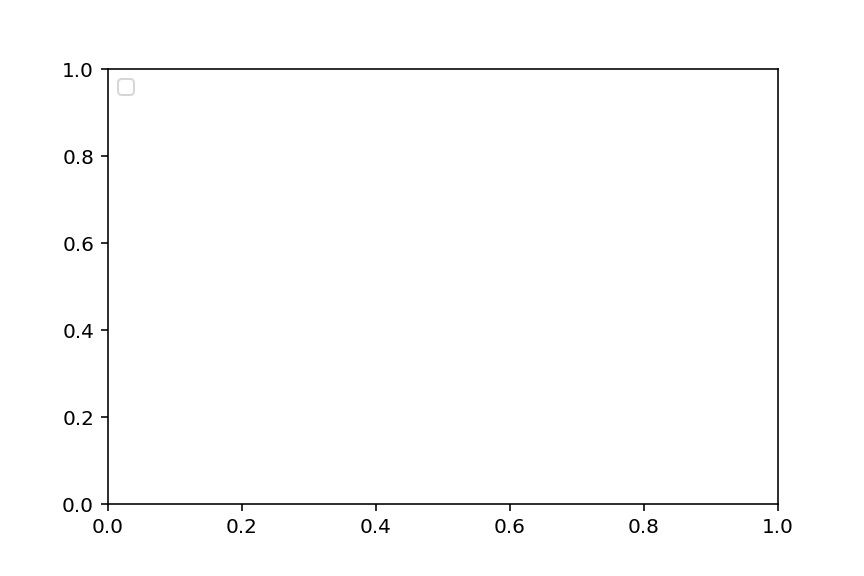

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


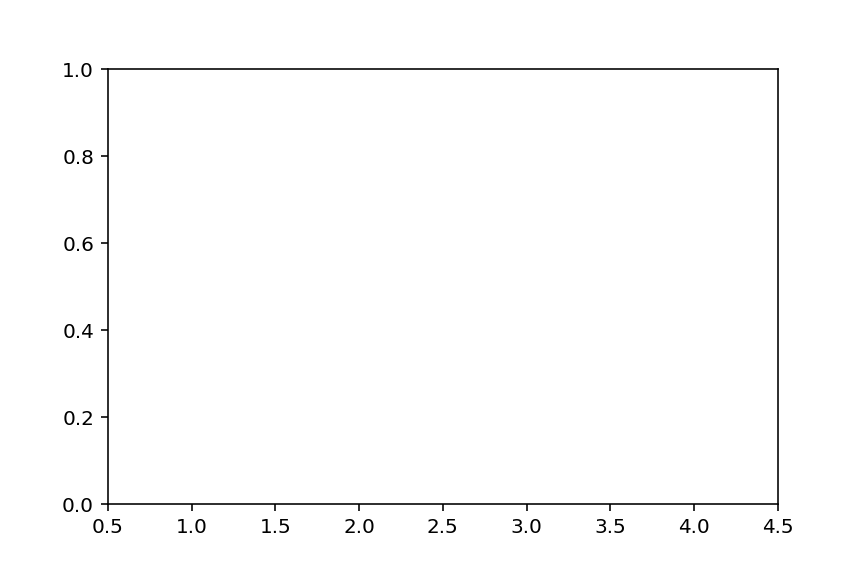

In [25]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


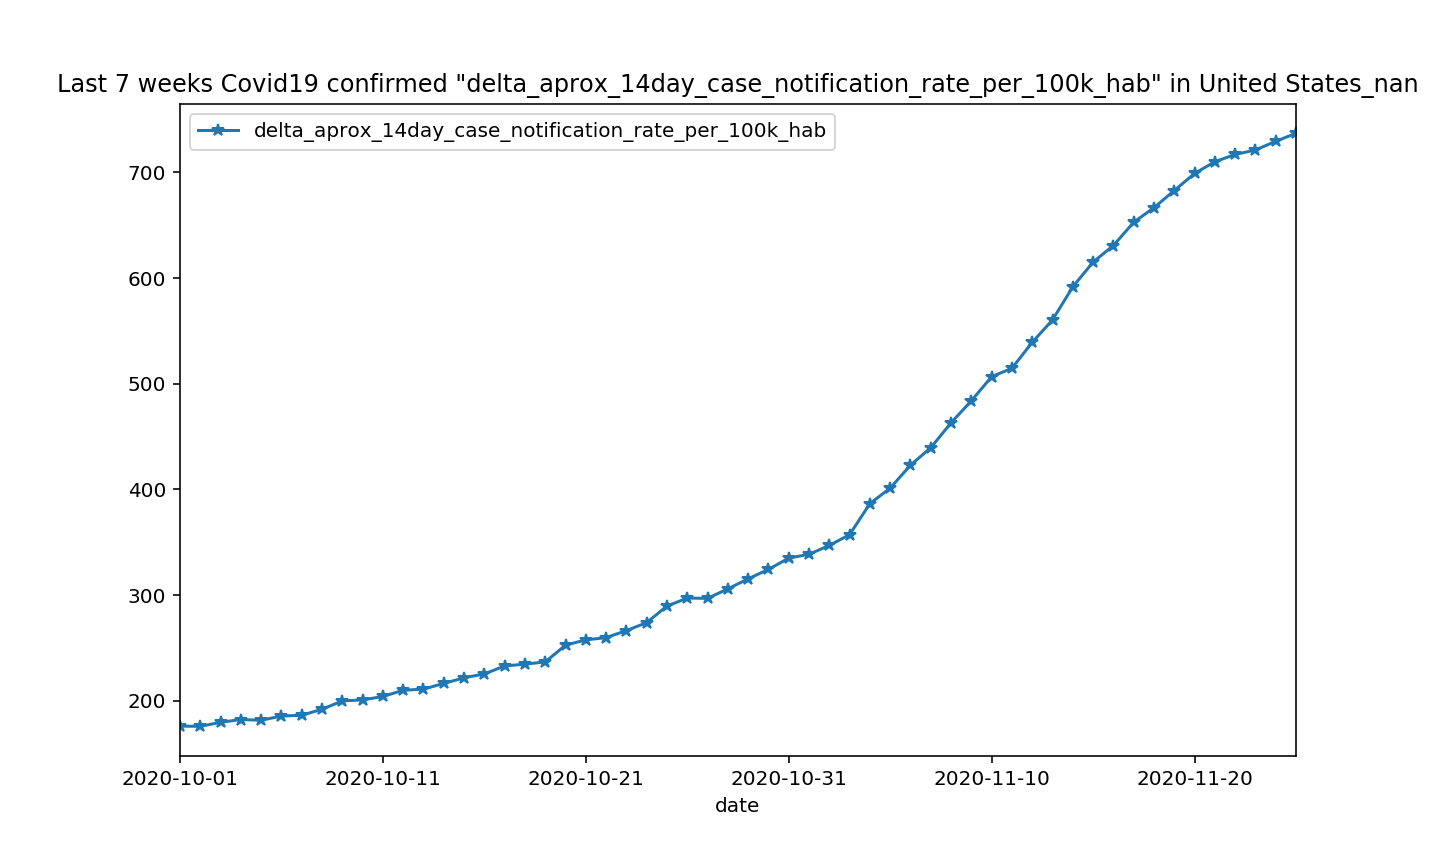

In [27]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


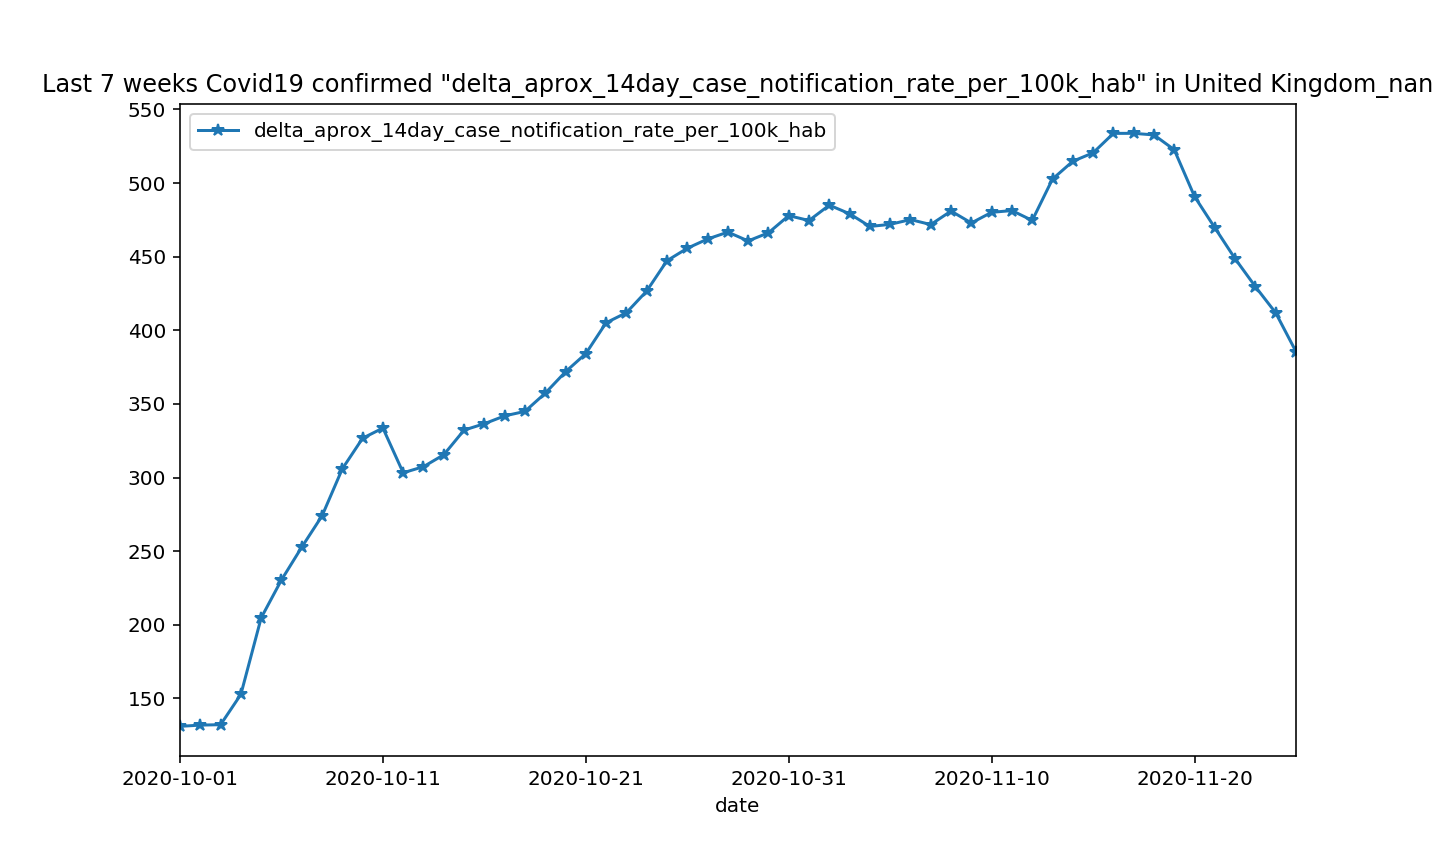

In [28]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


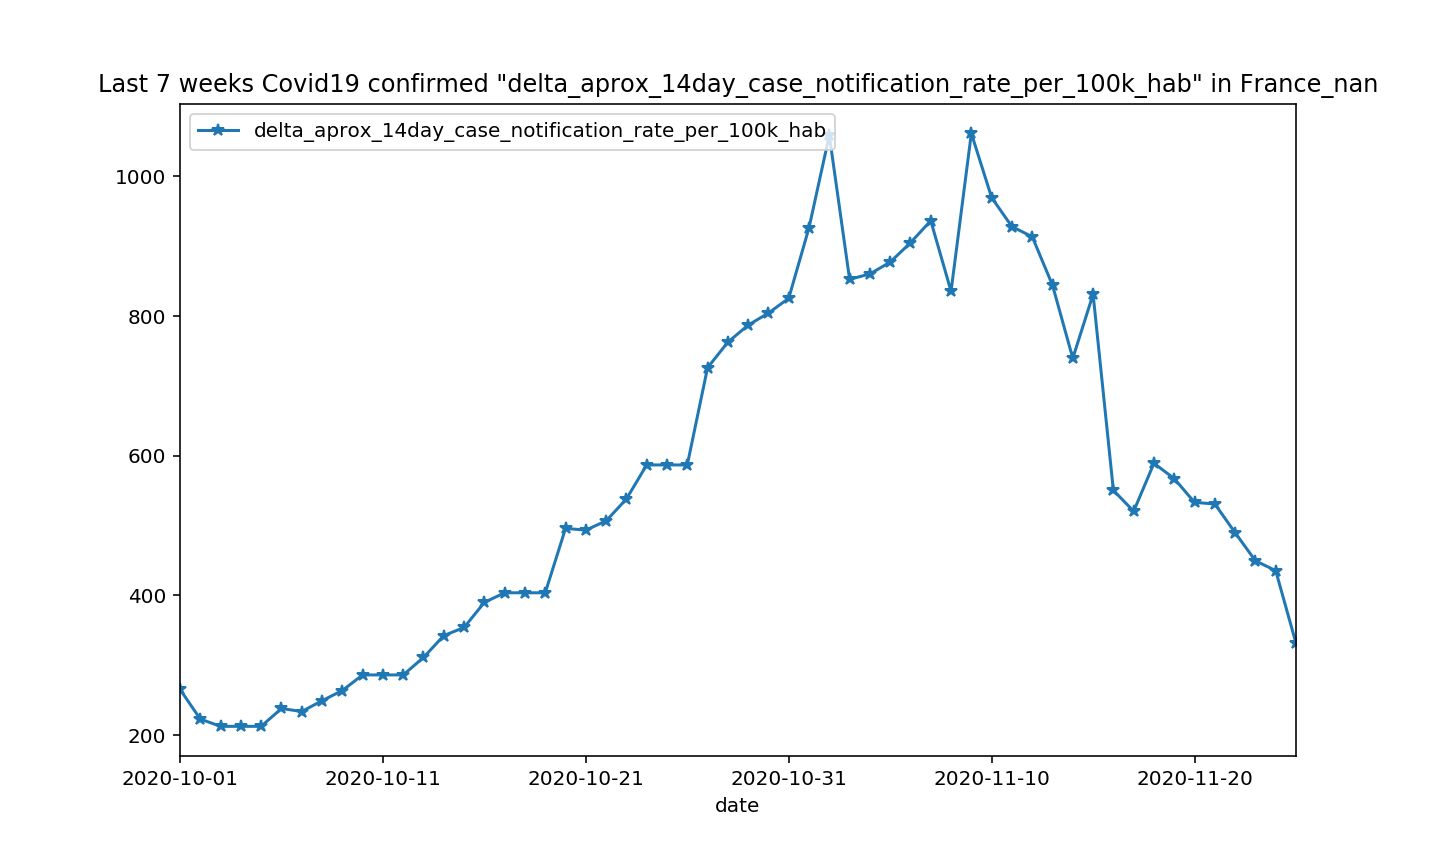

In [29]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


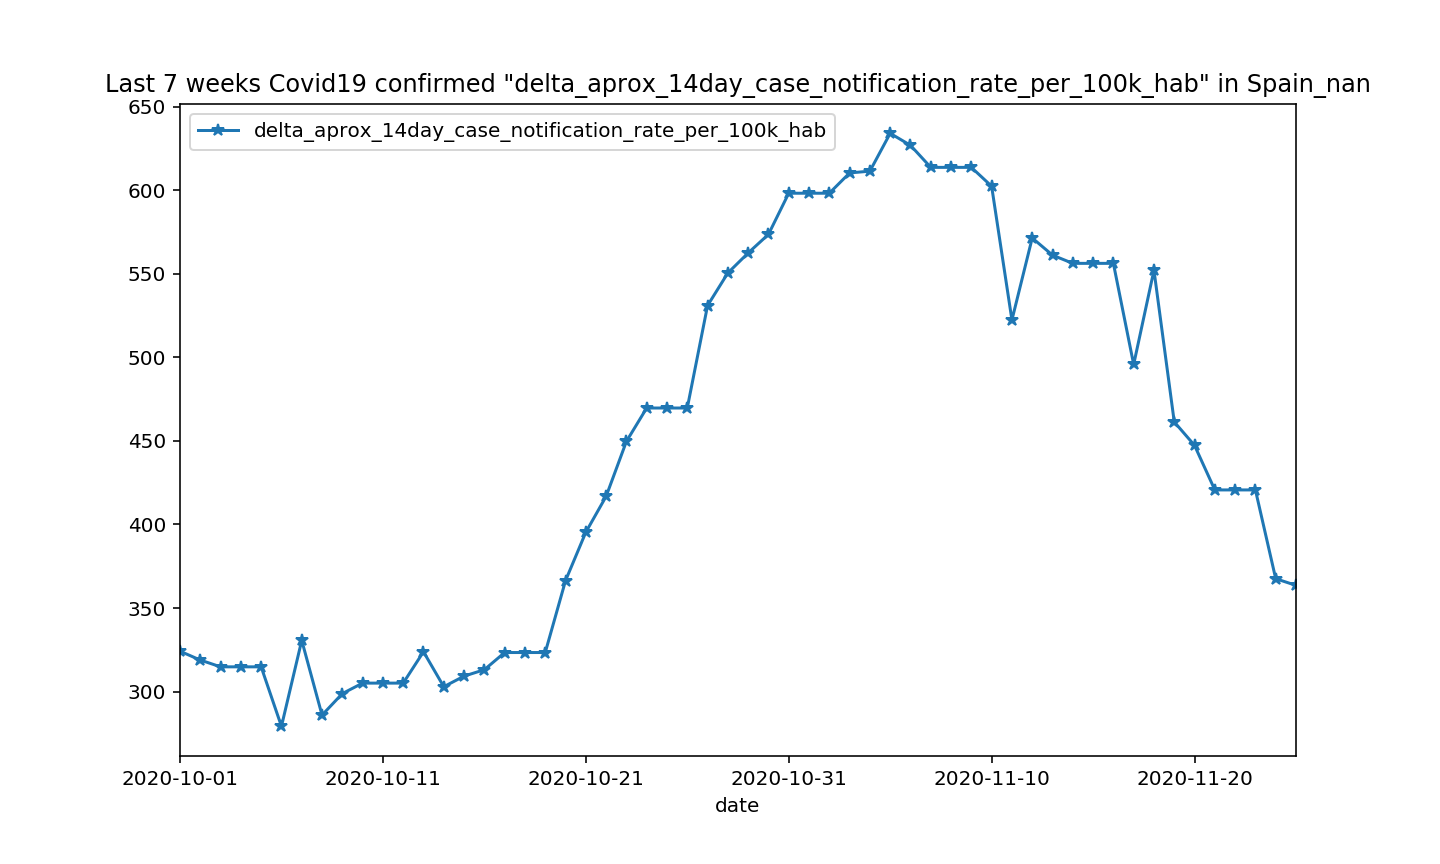

In [30]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


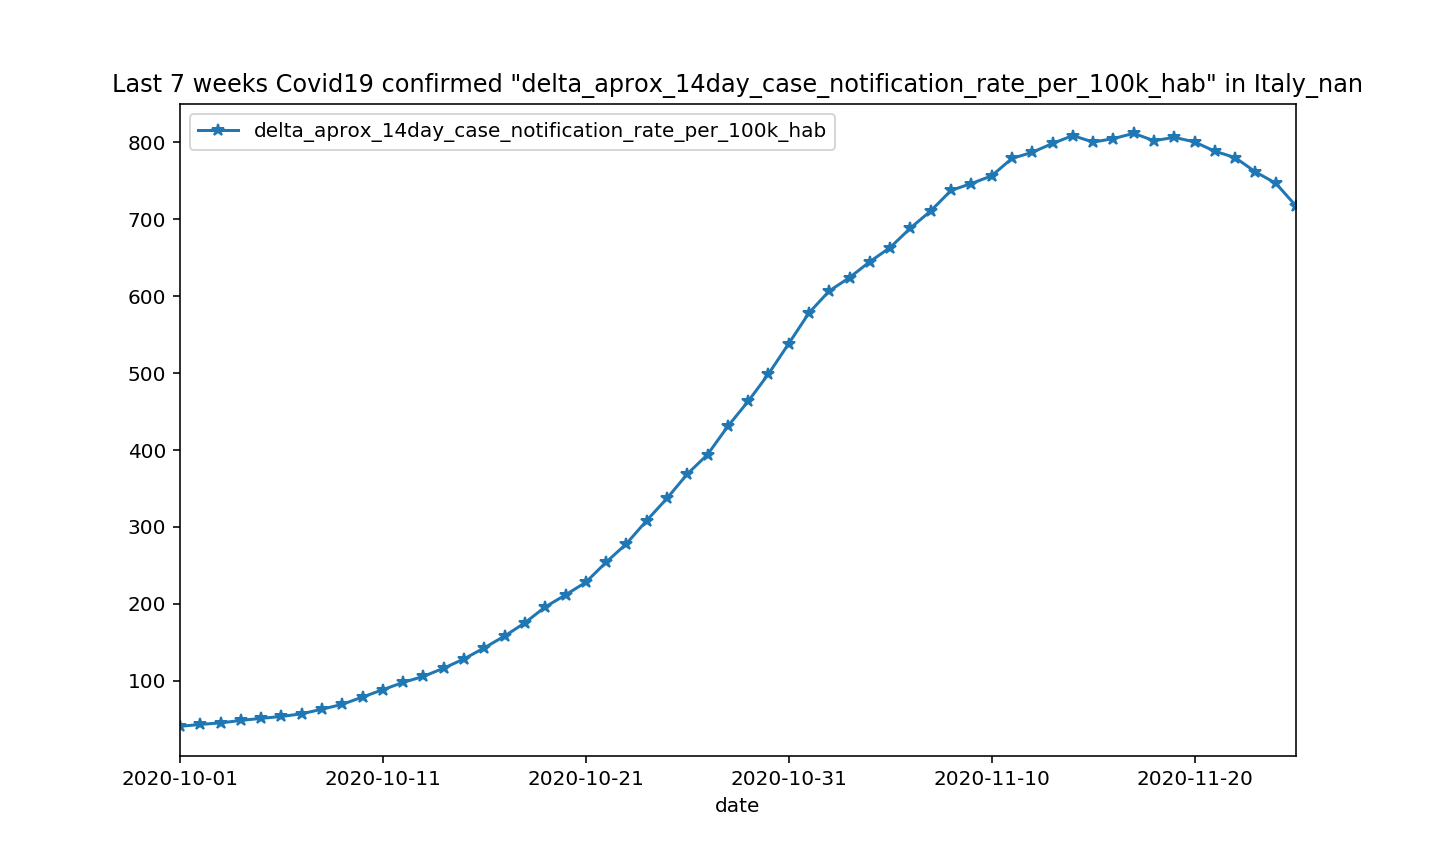

In [31]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


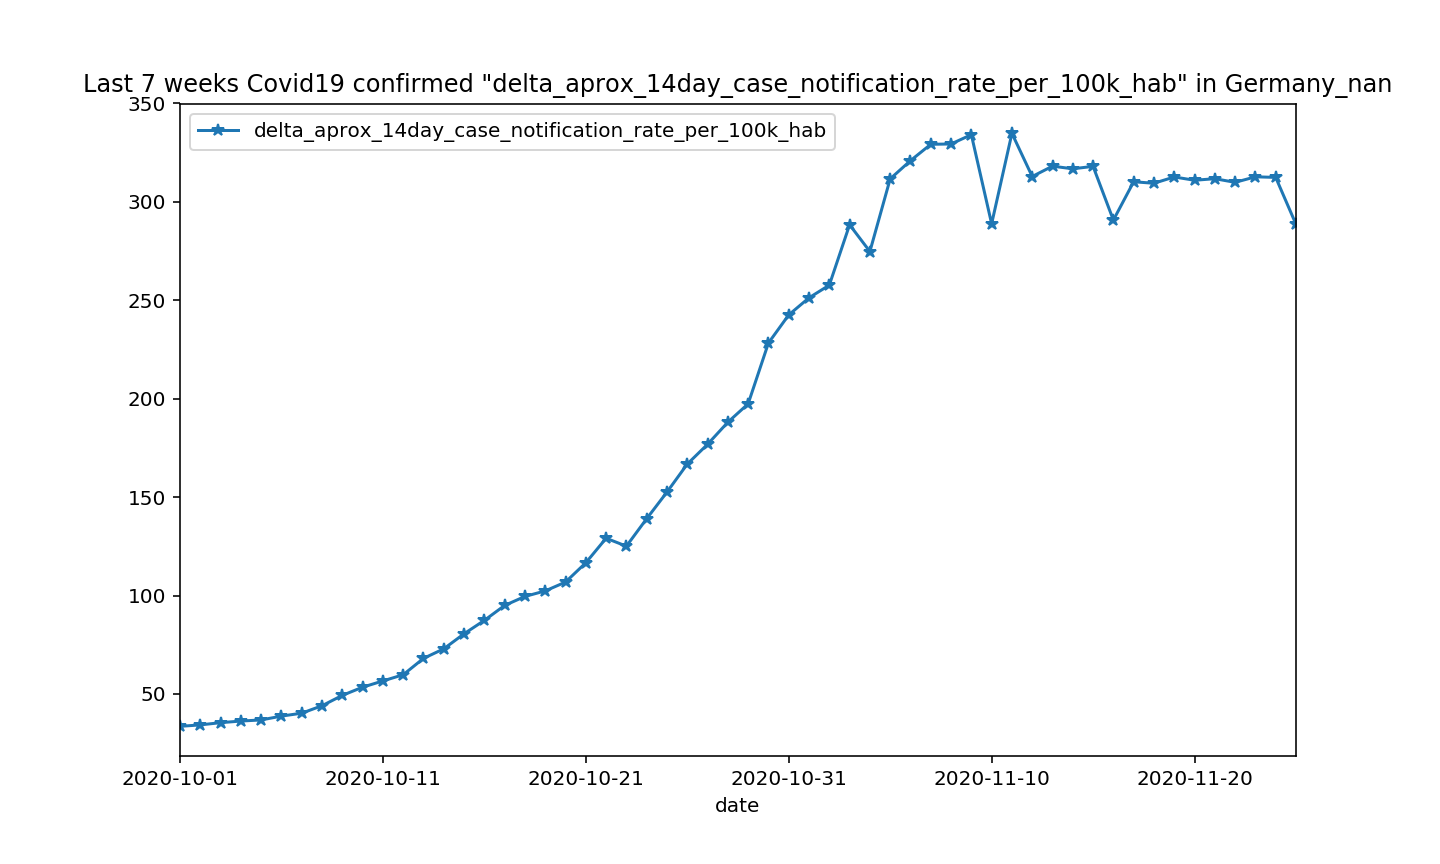

In [32]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


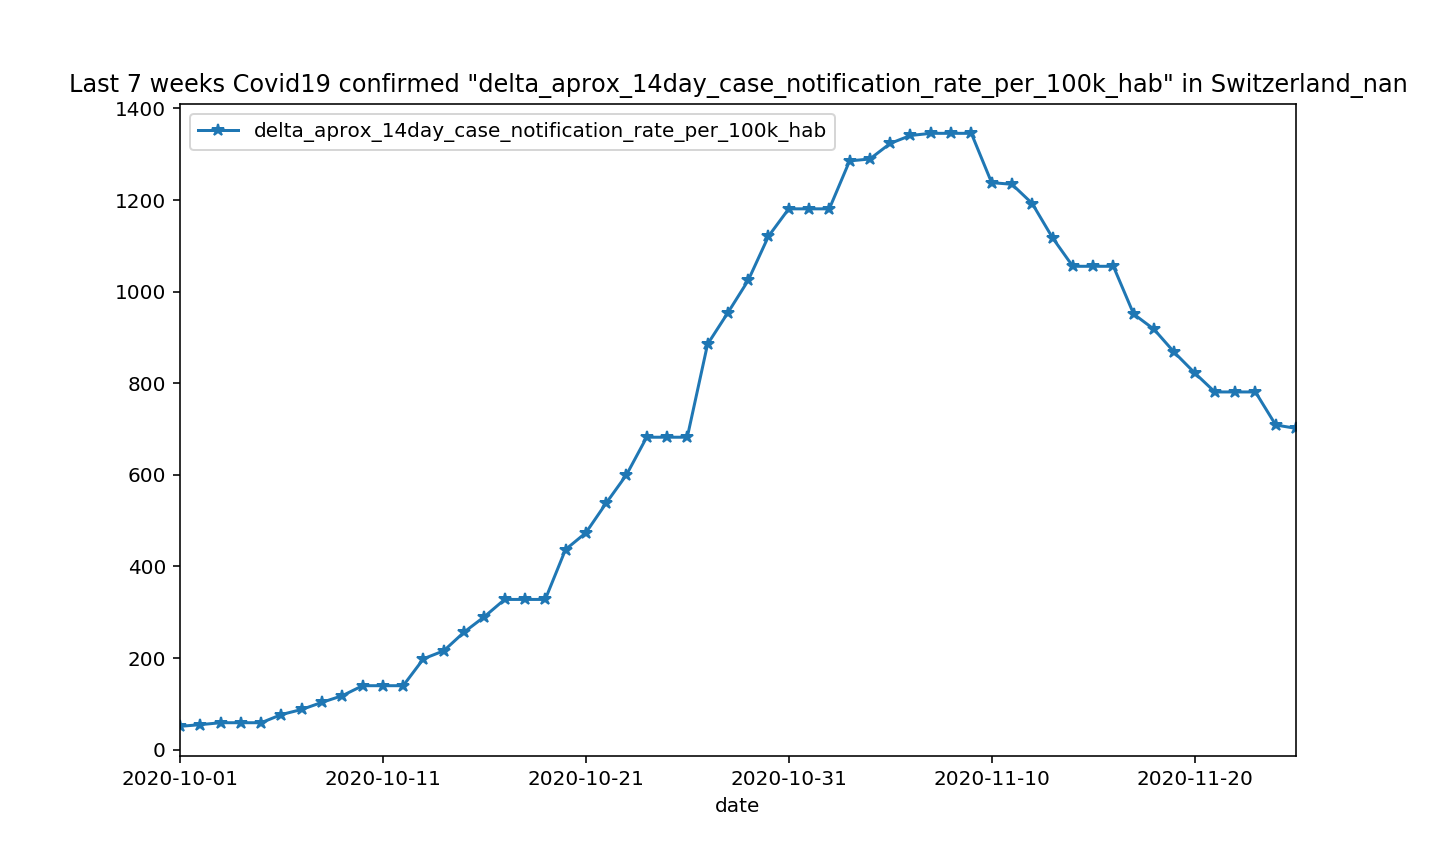

In [33]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


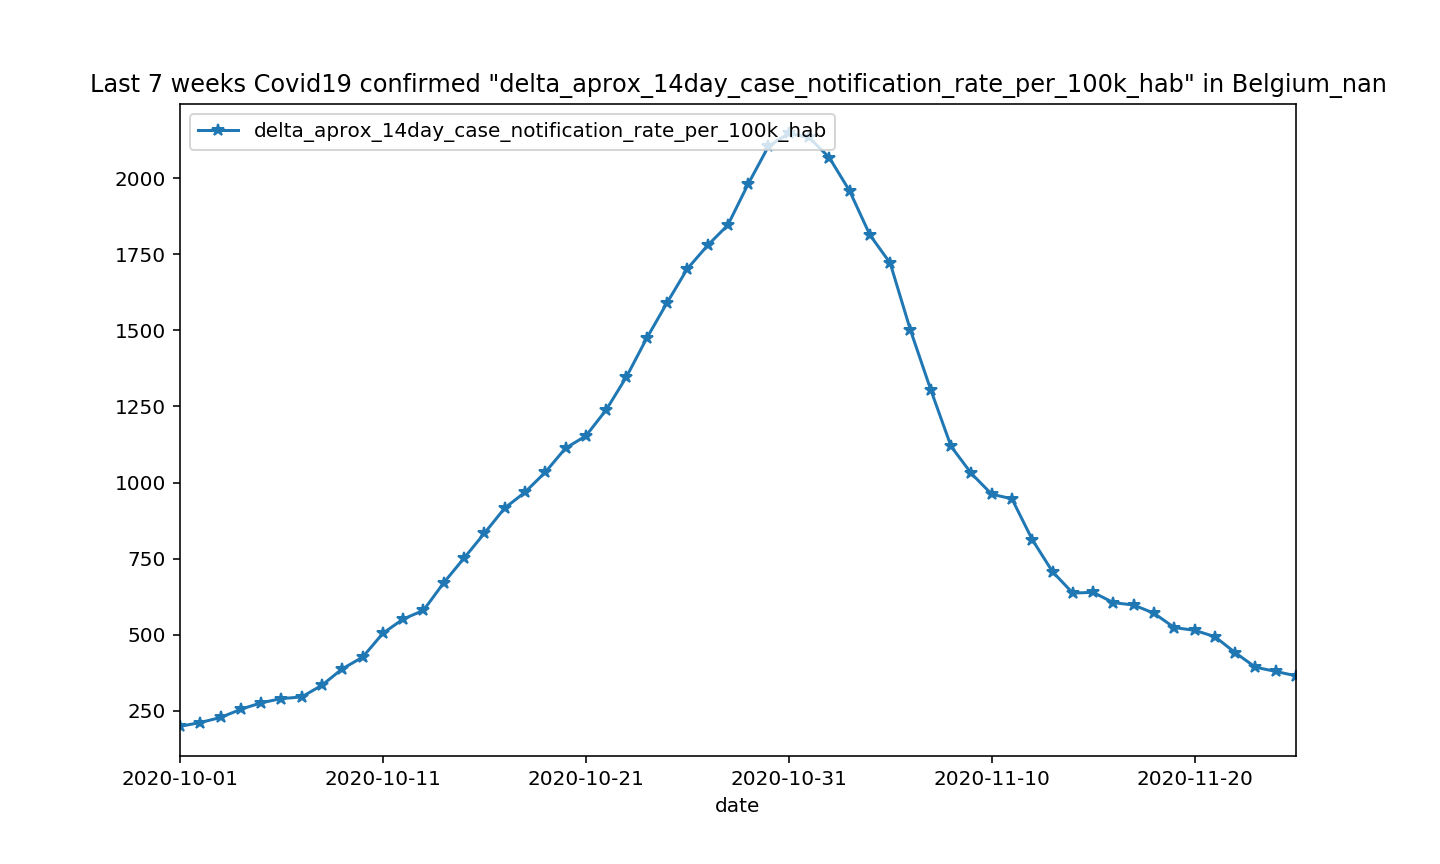

In [34]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


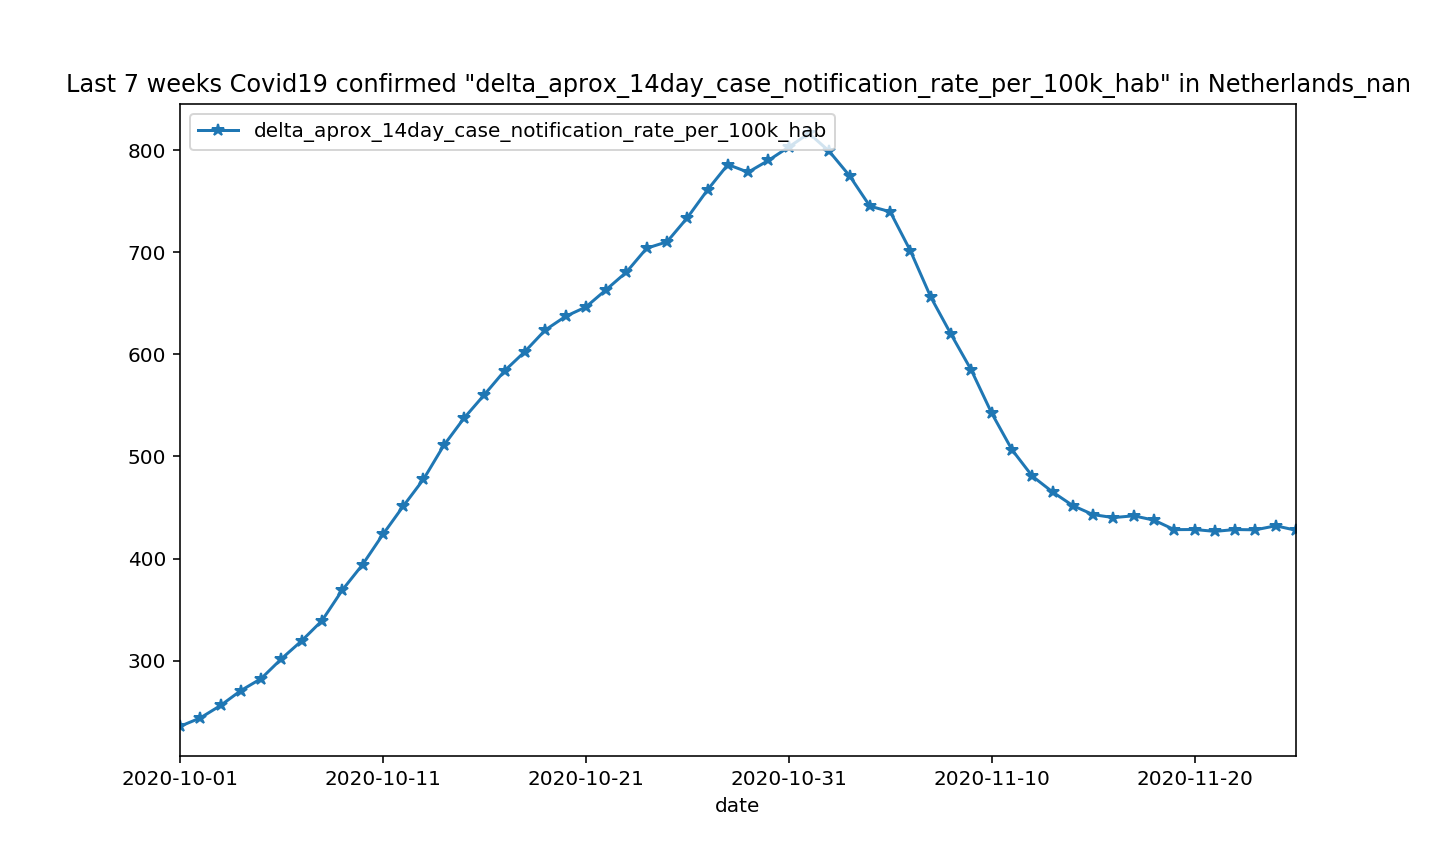

In [35]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


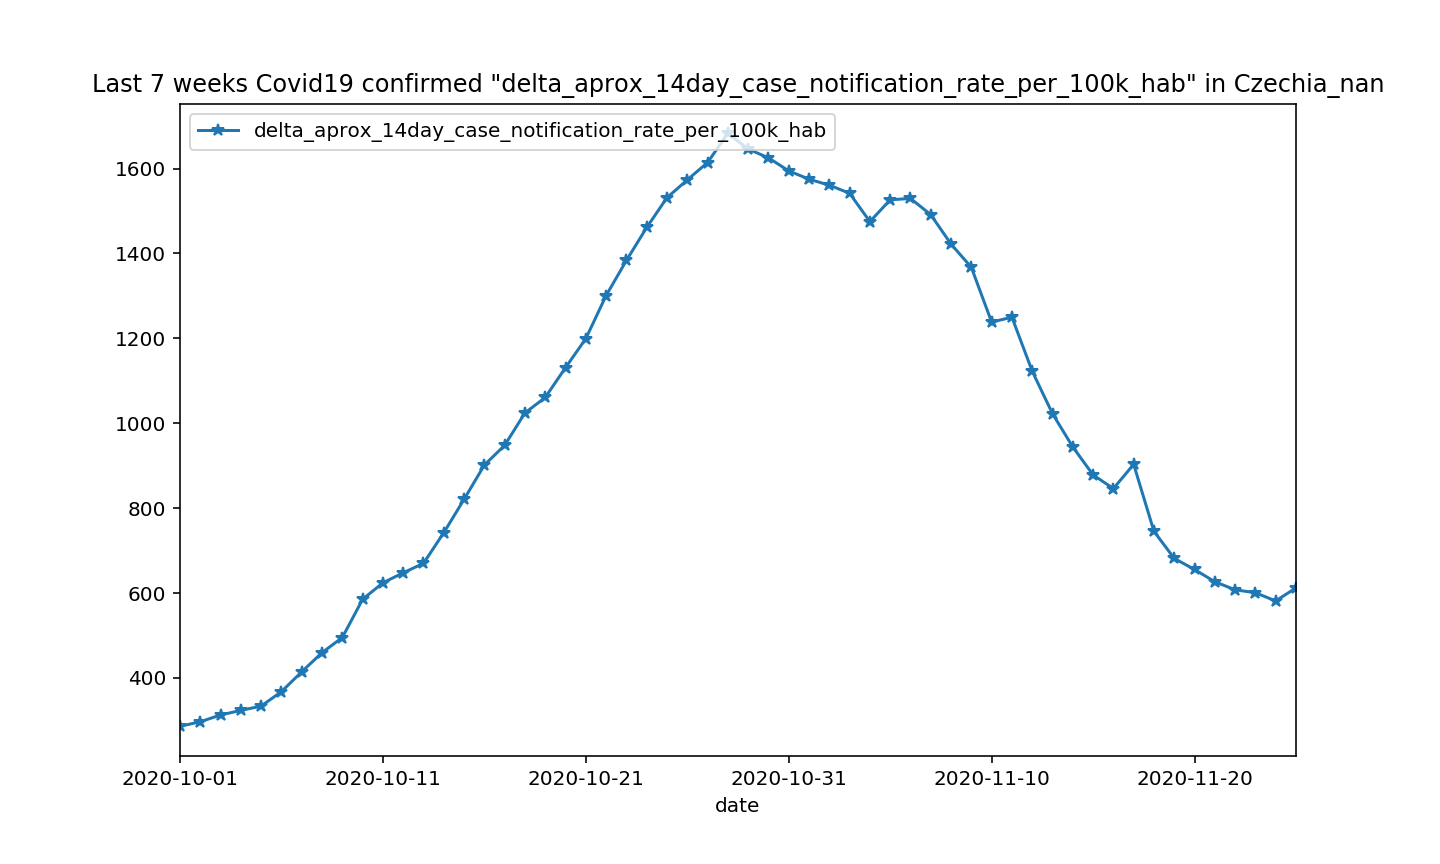

In [36]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


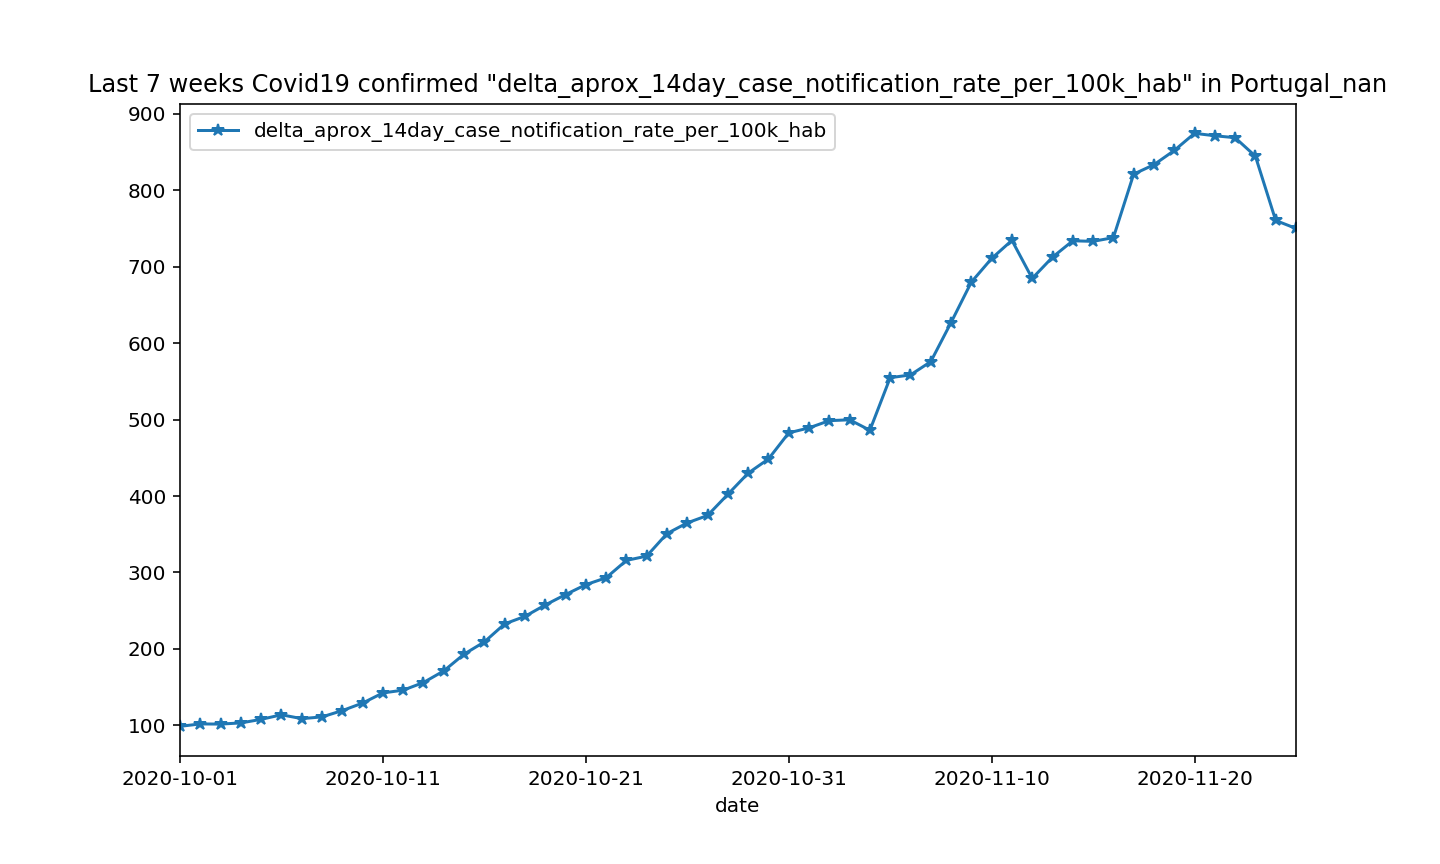

In [39]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [40]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


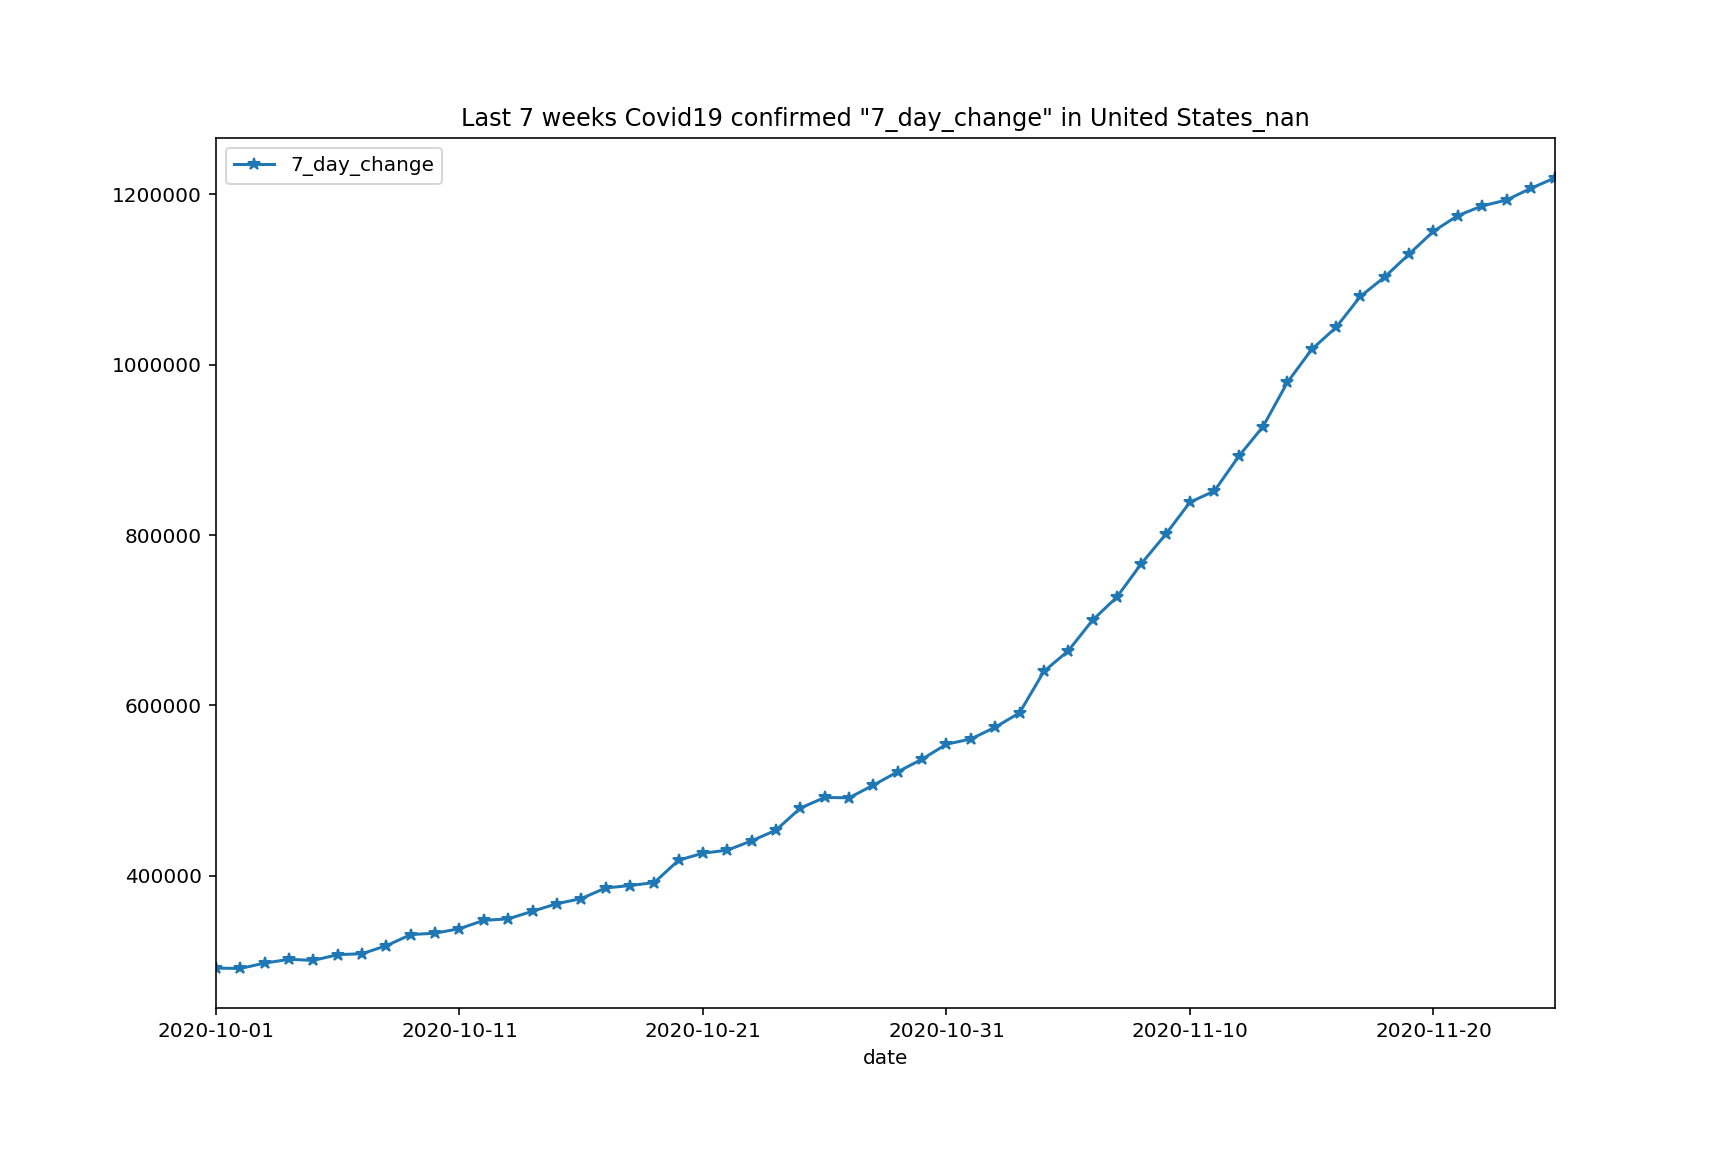

In [41]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


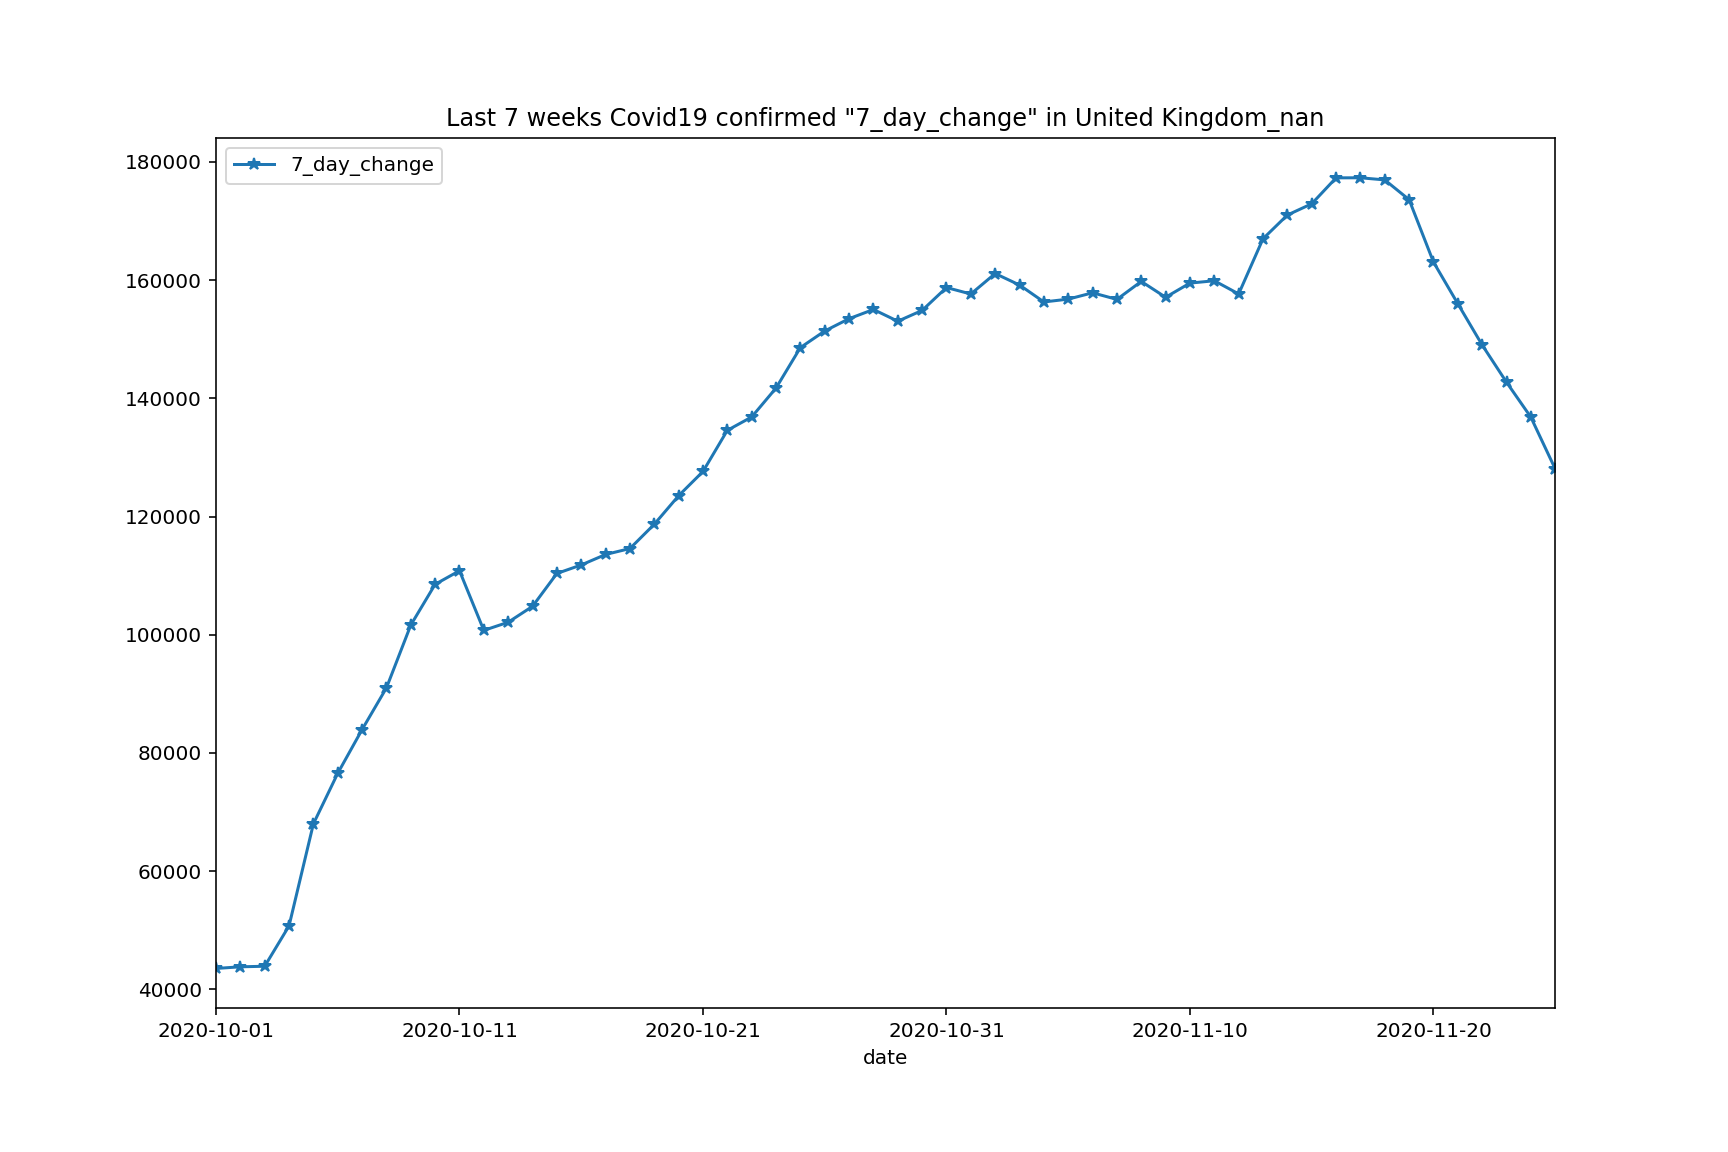

In [42]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


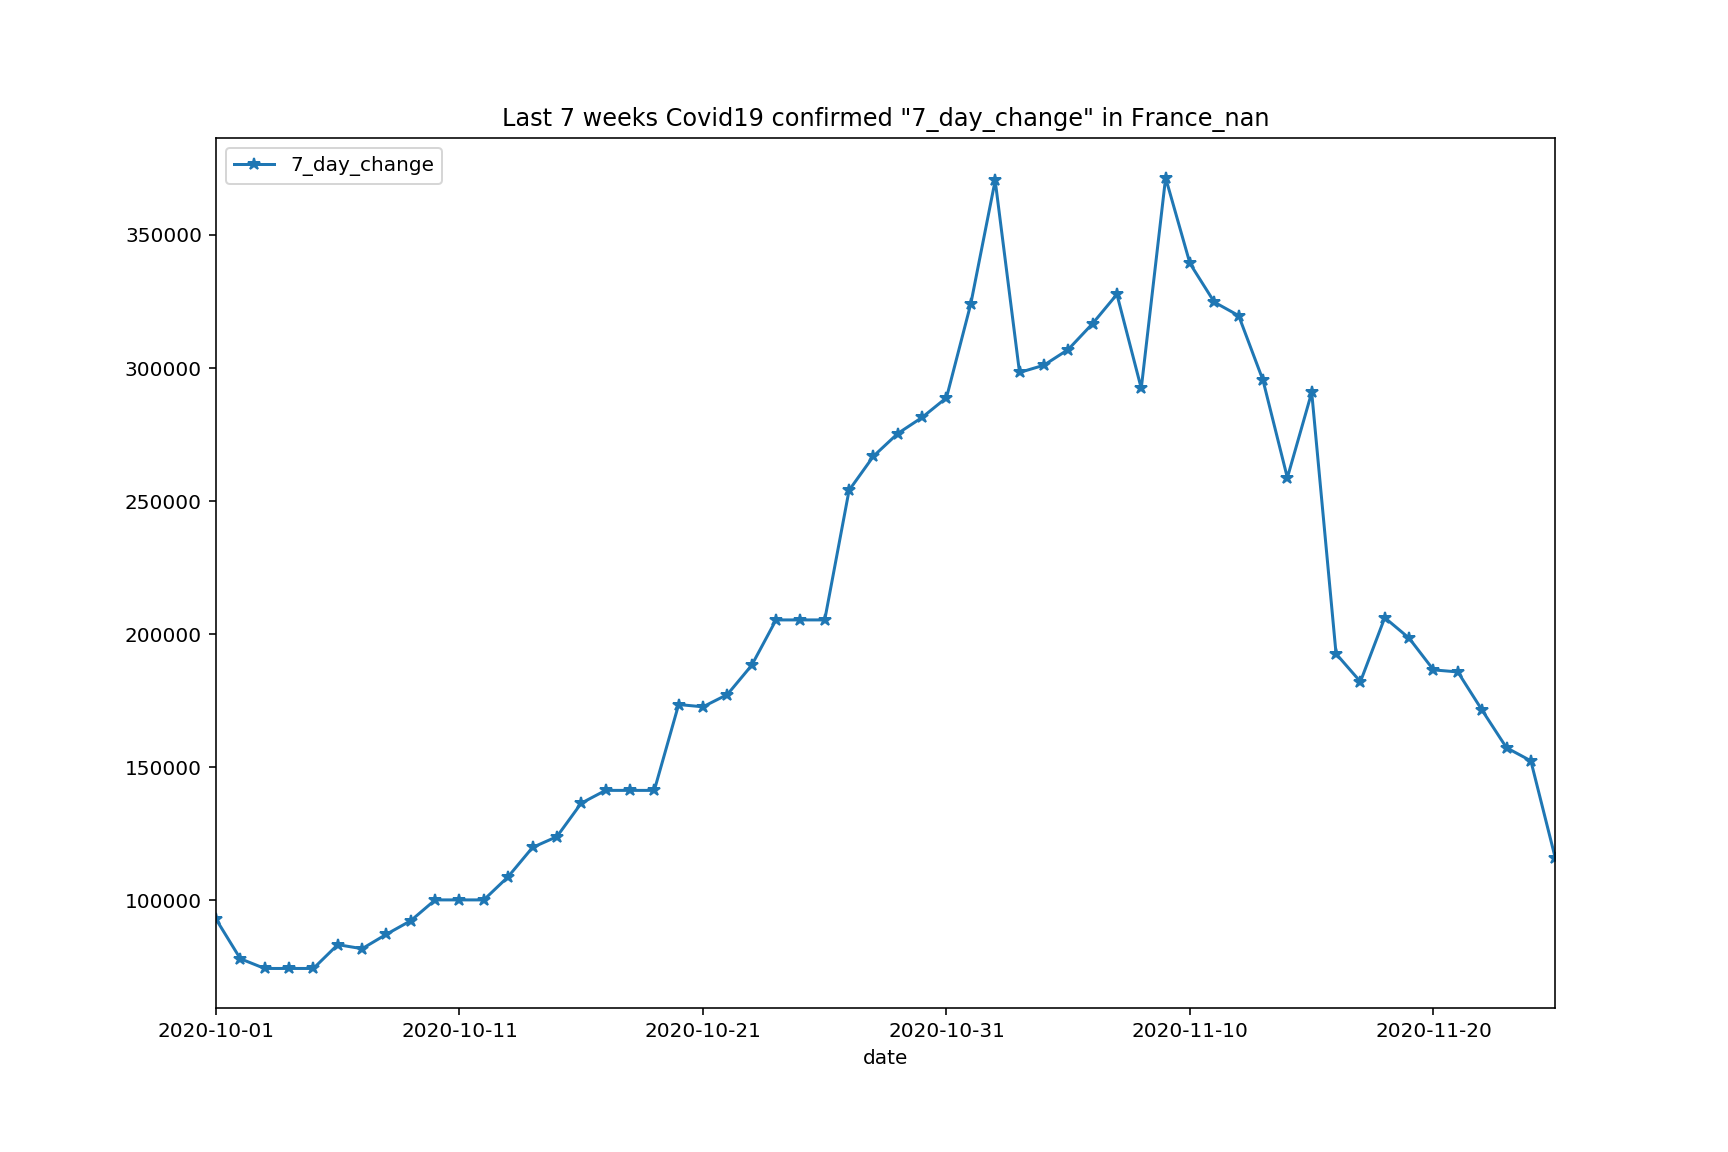

In [43]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


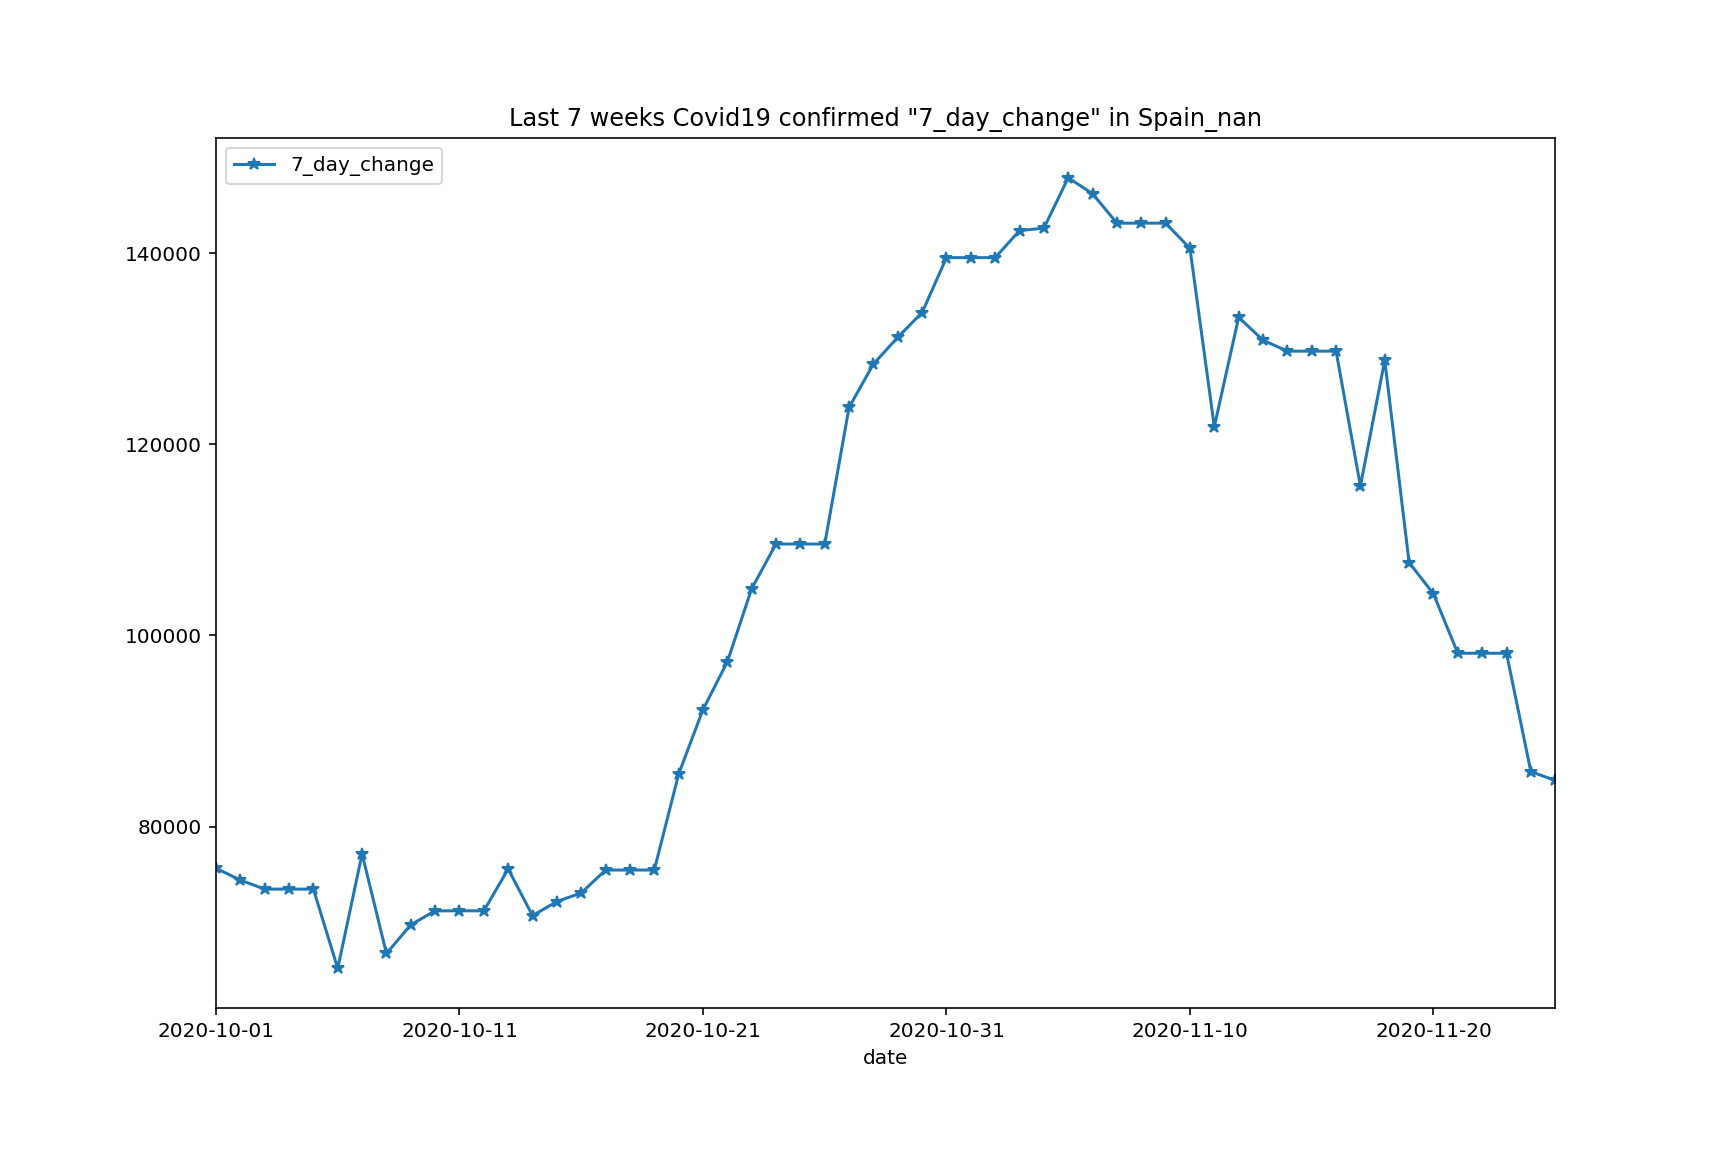

In [44]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


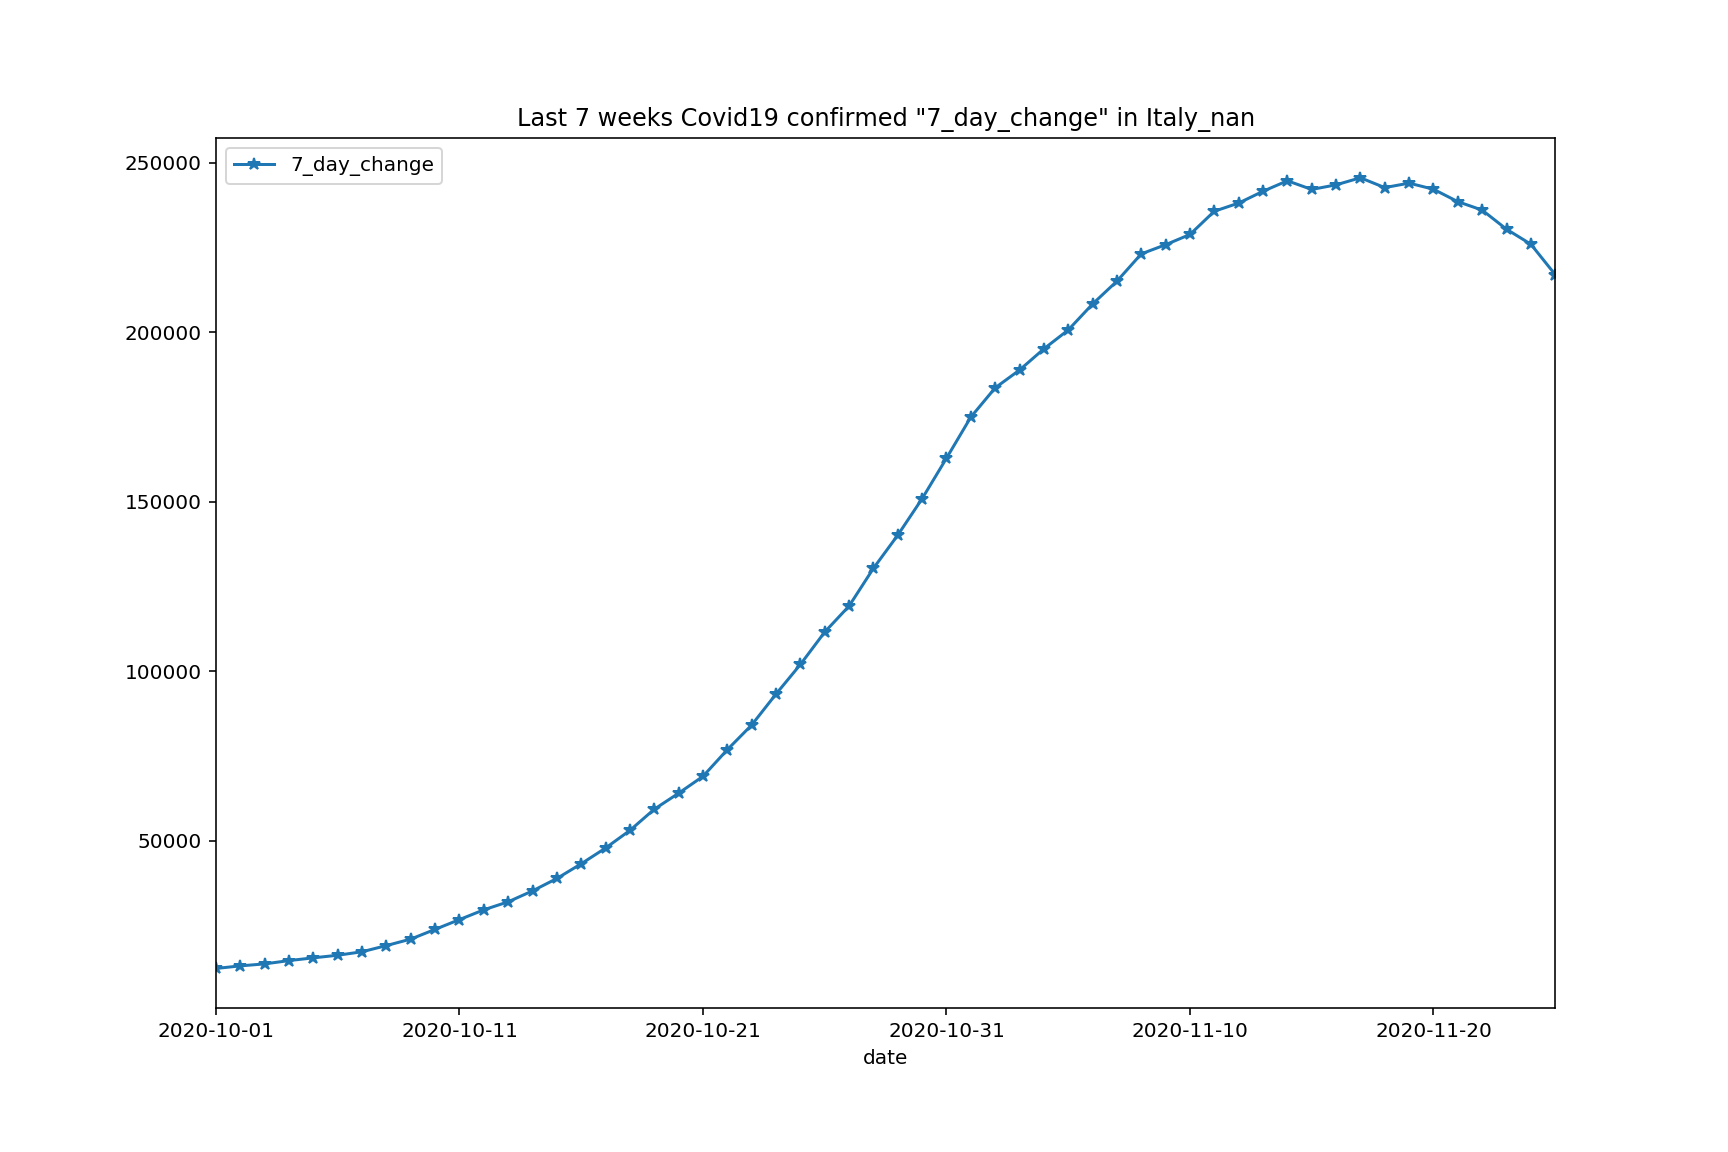

In [45]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


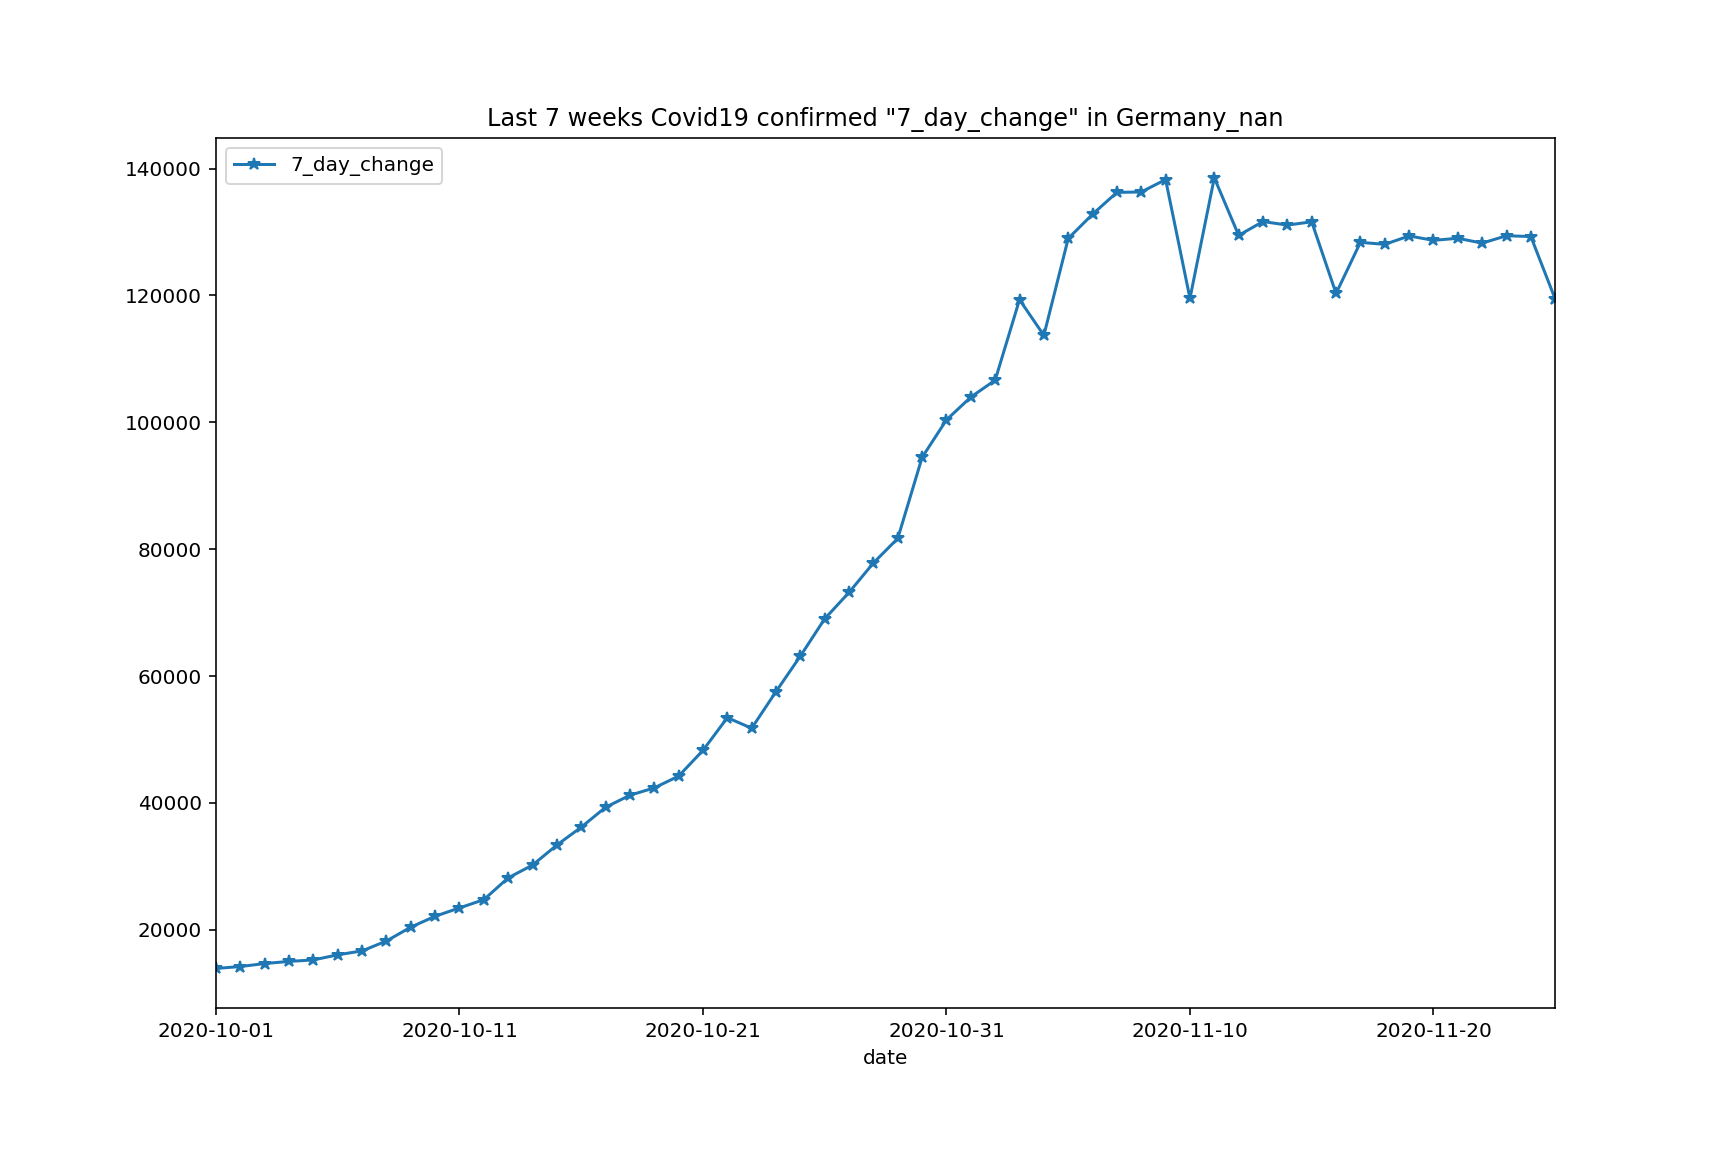

In [46]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


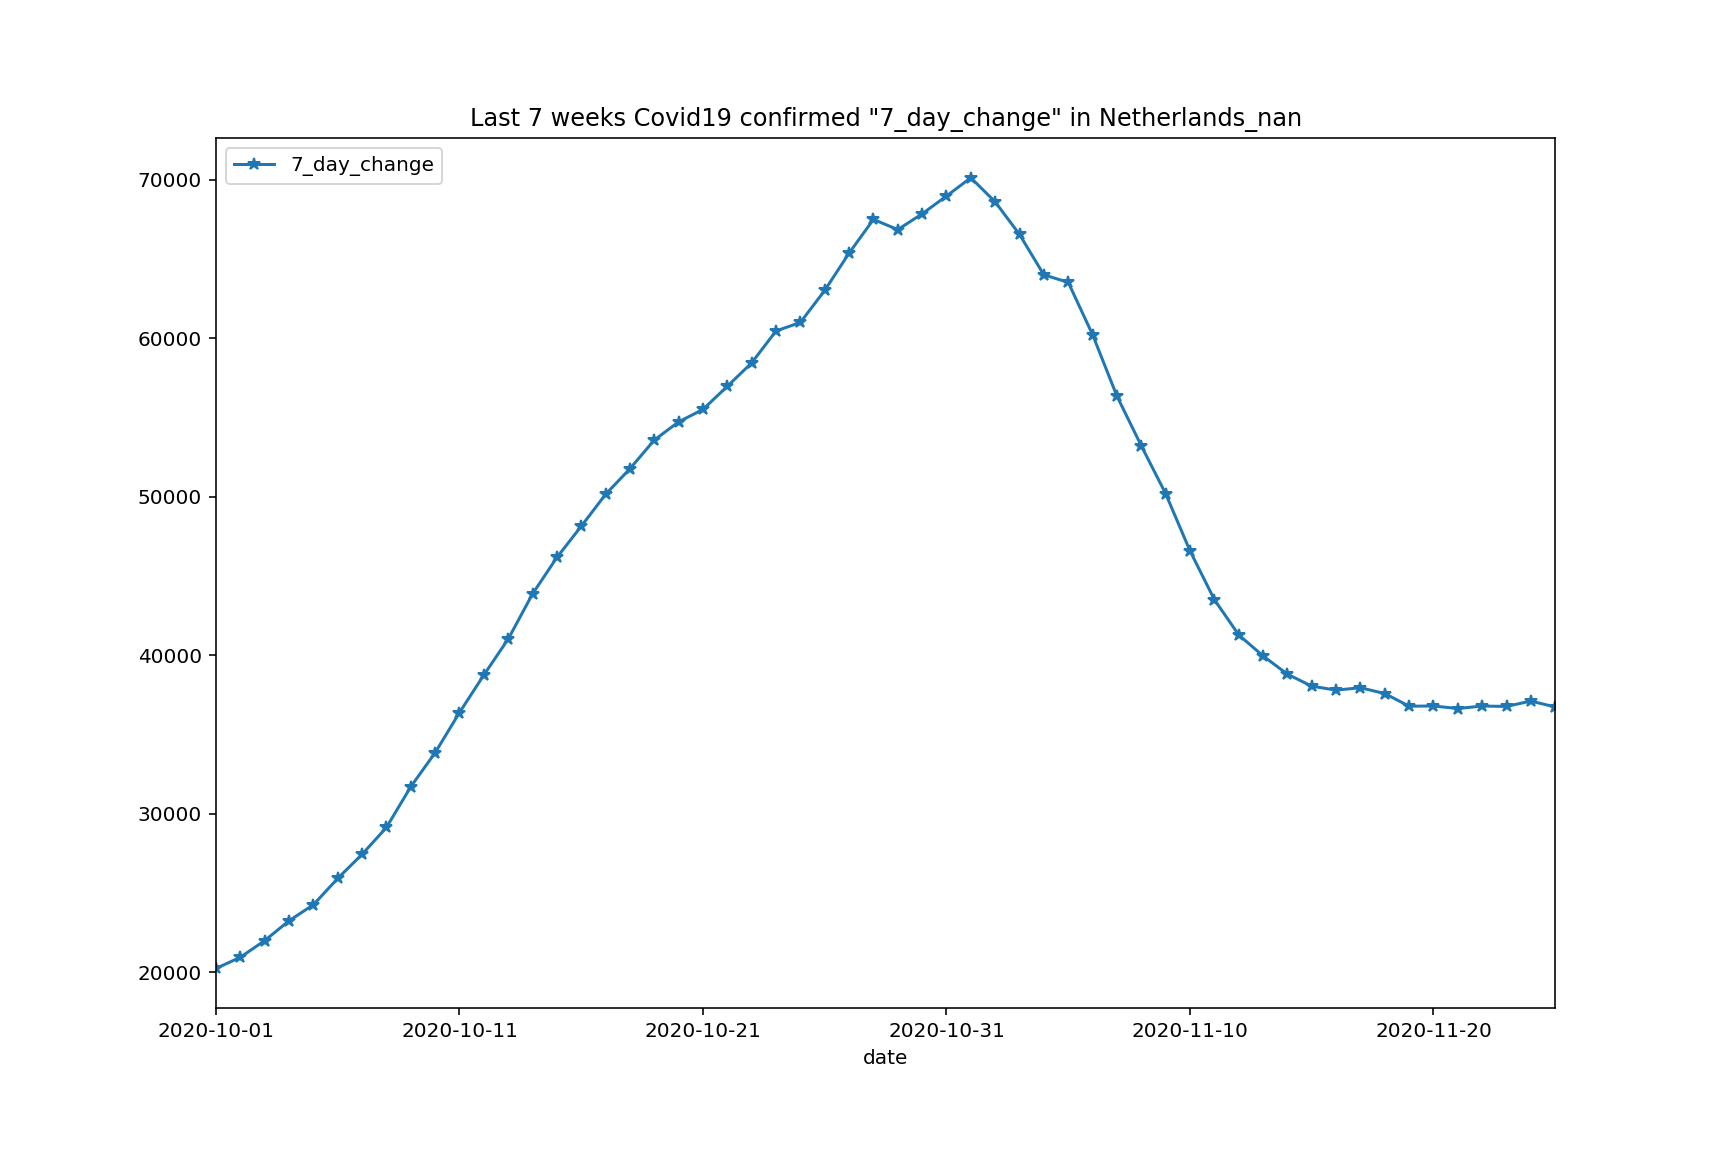

In [47]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


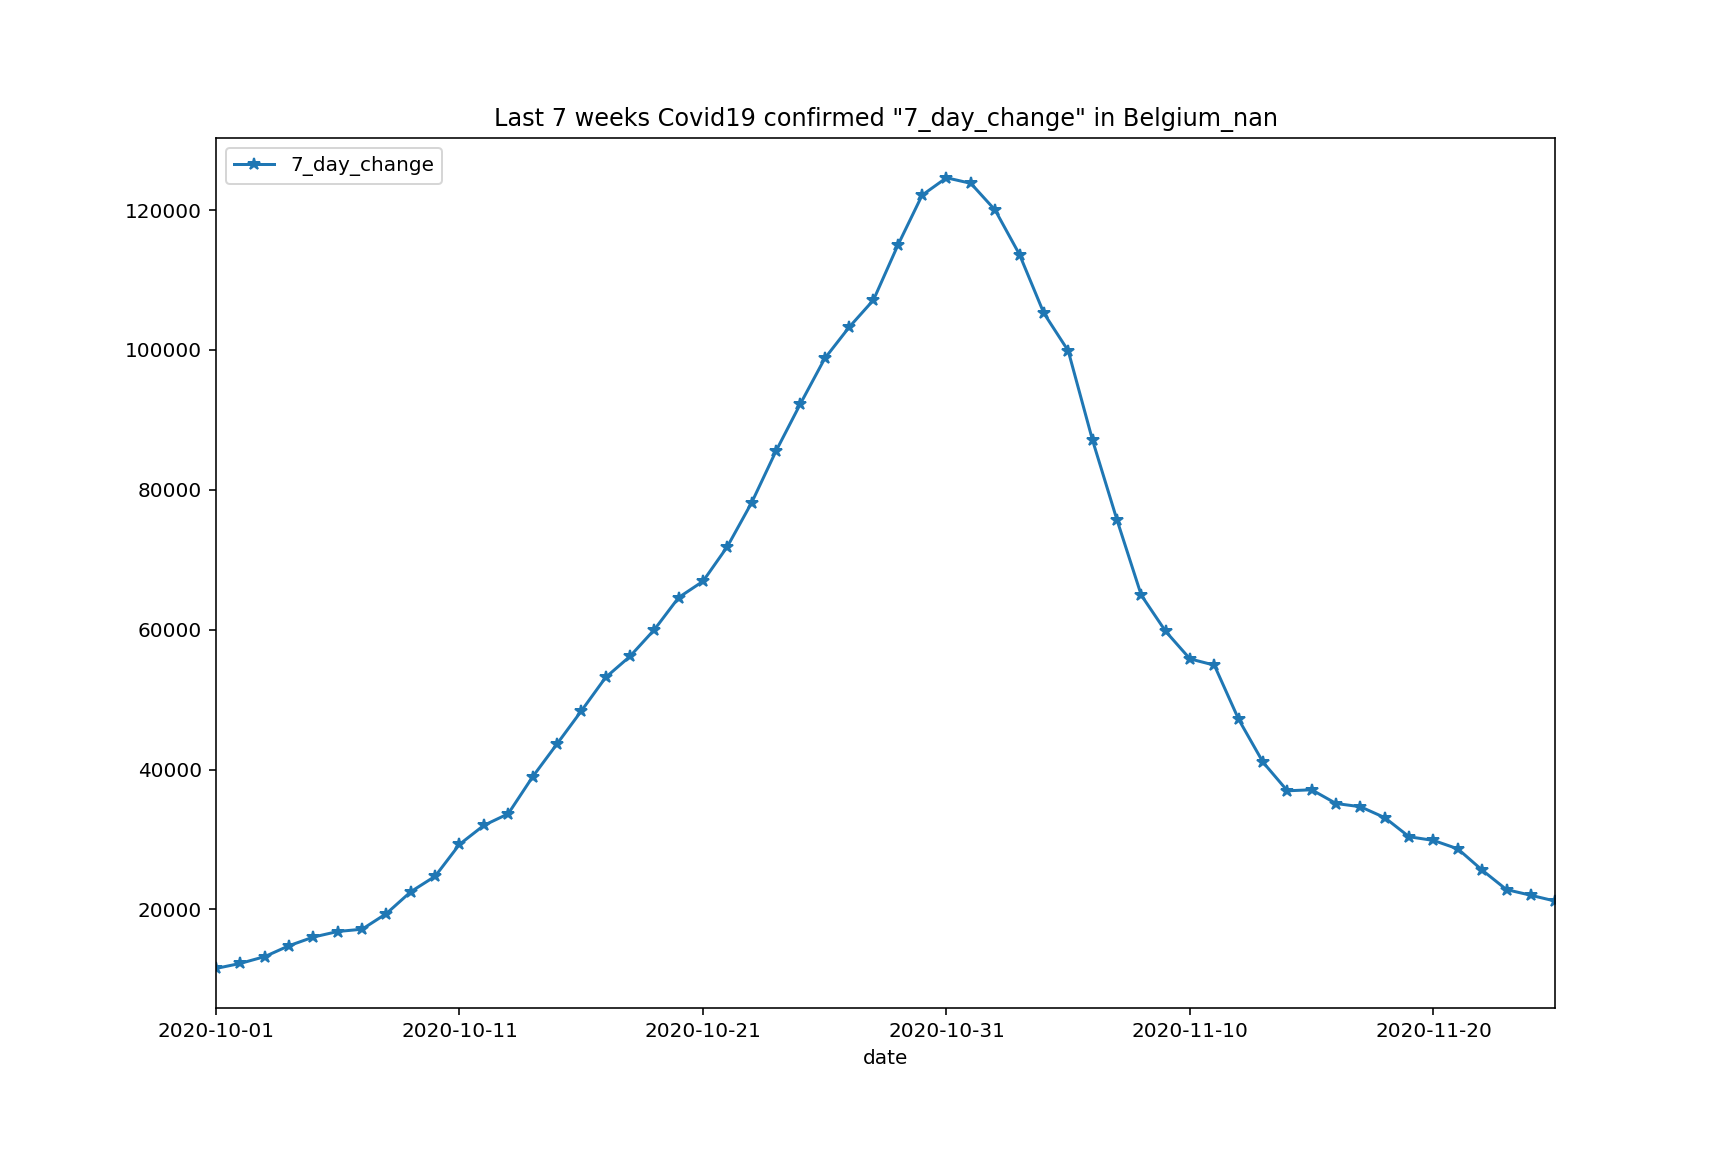

In [48]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


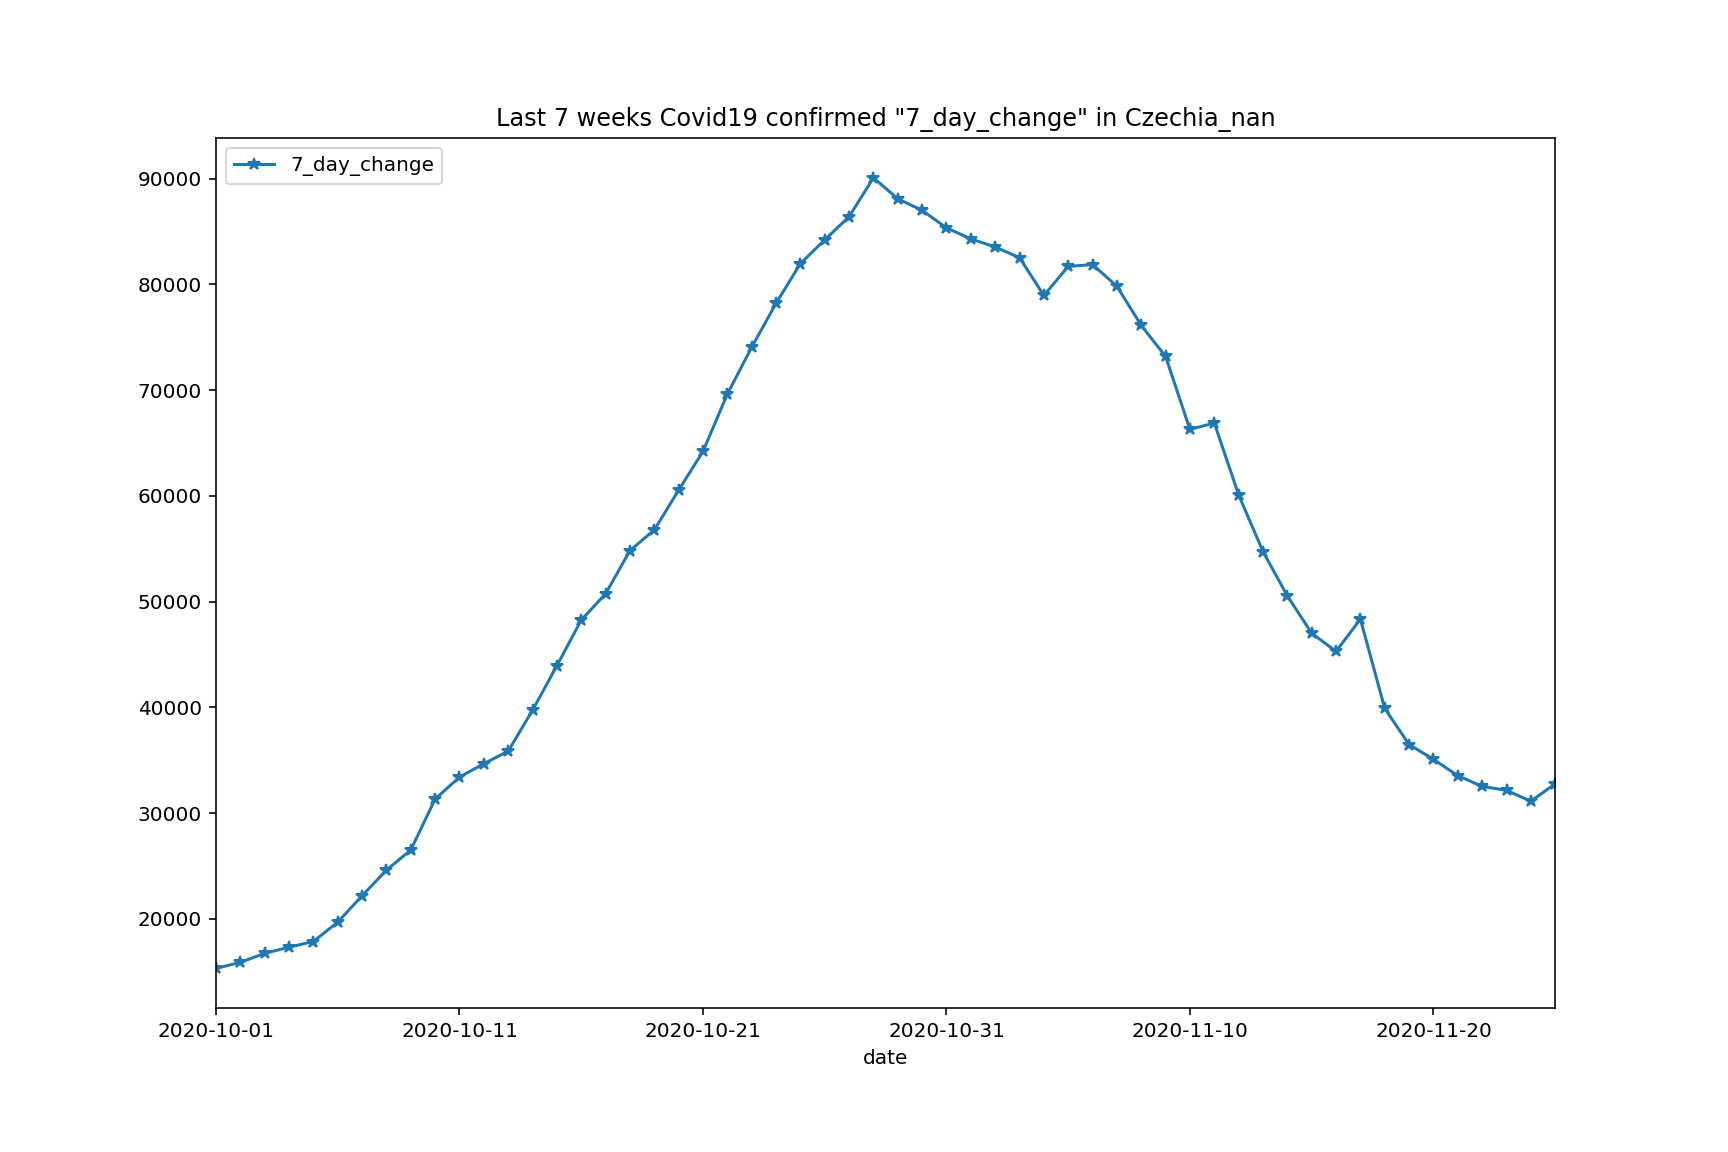

In [49]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

<IPython.core.display.Javascript object>


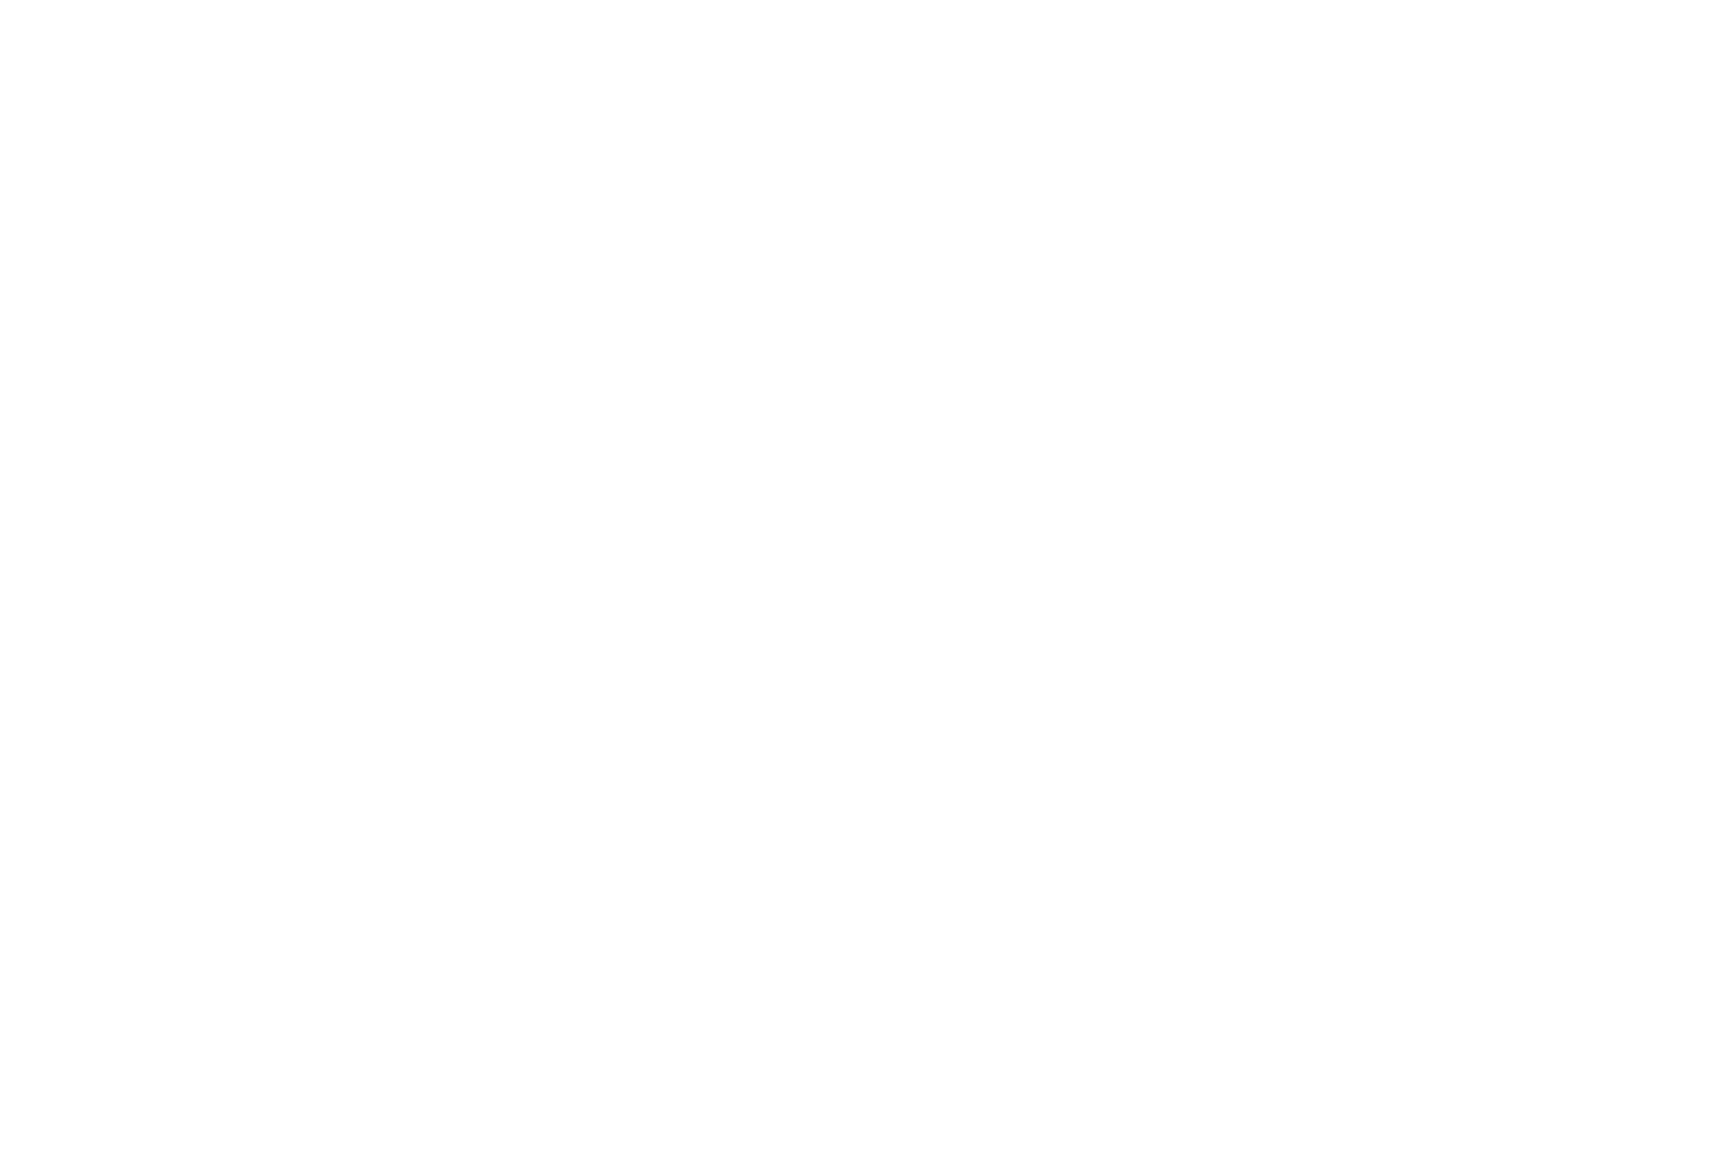

In [50]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [51]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


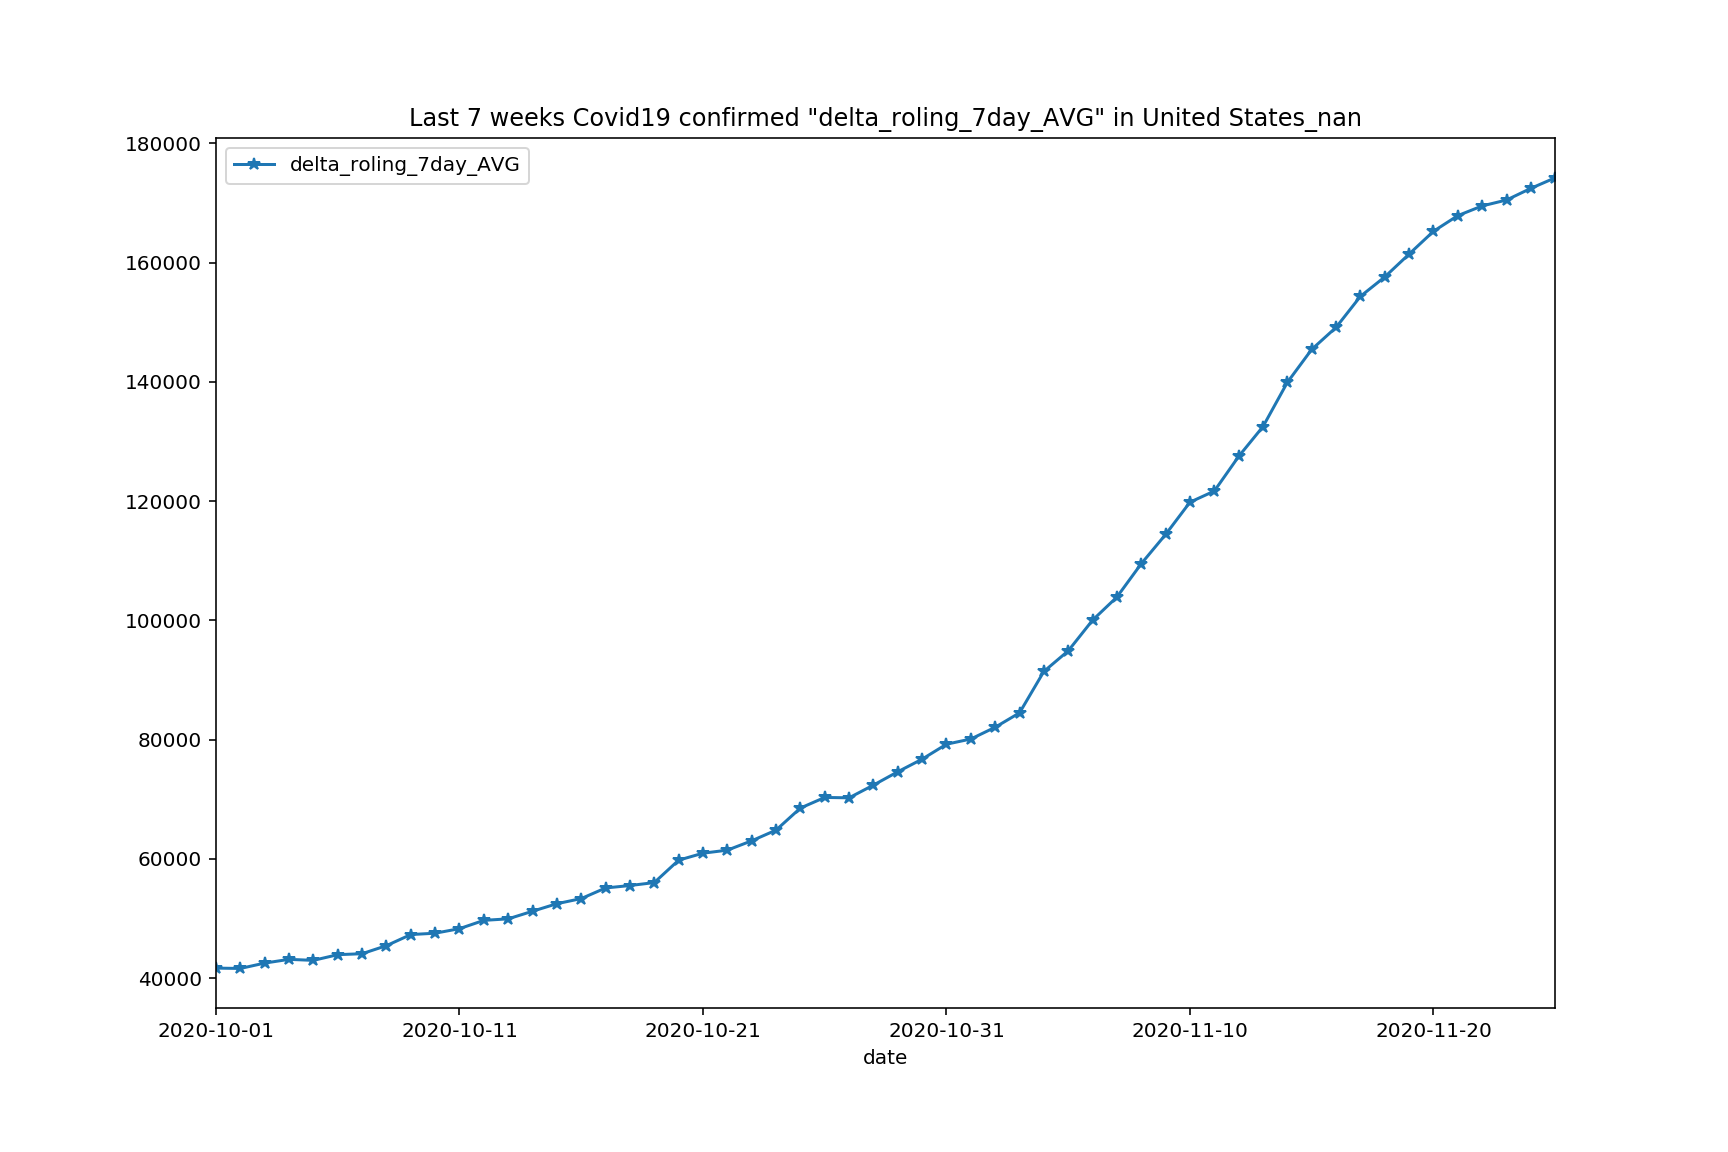

In [52]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


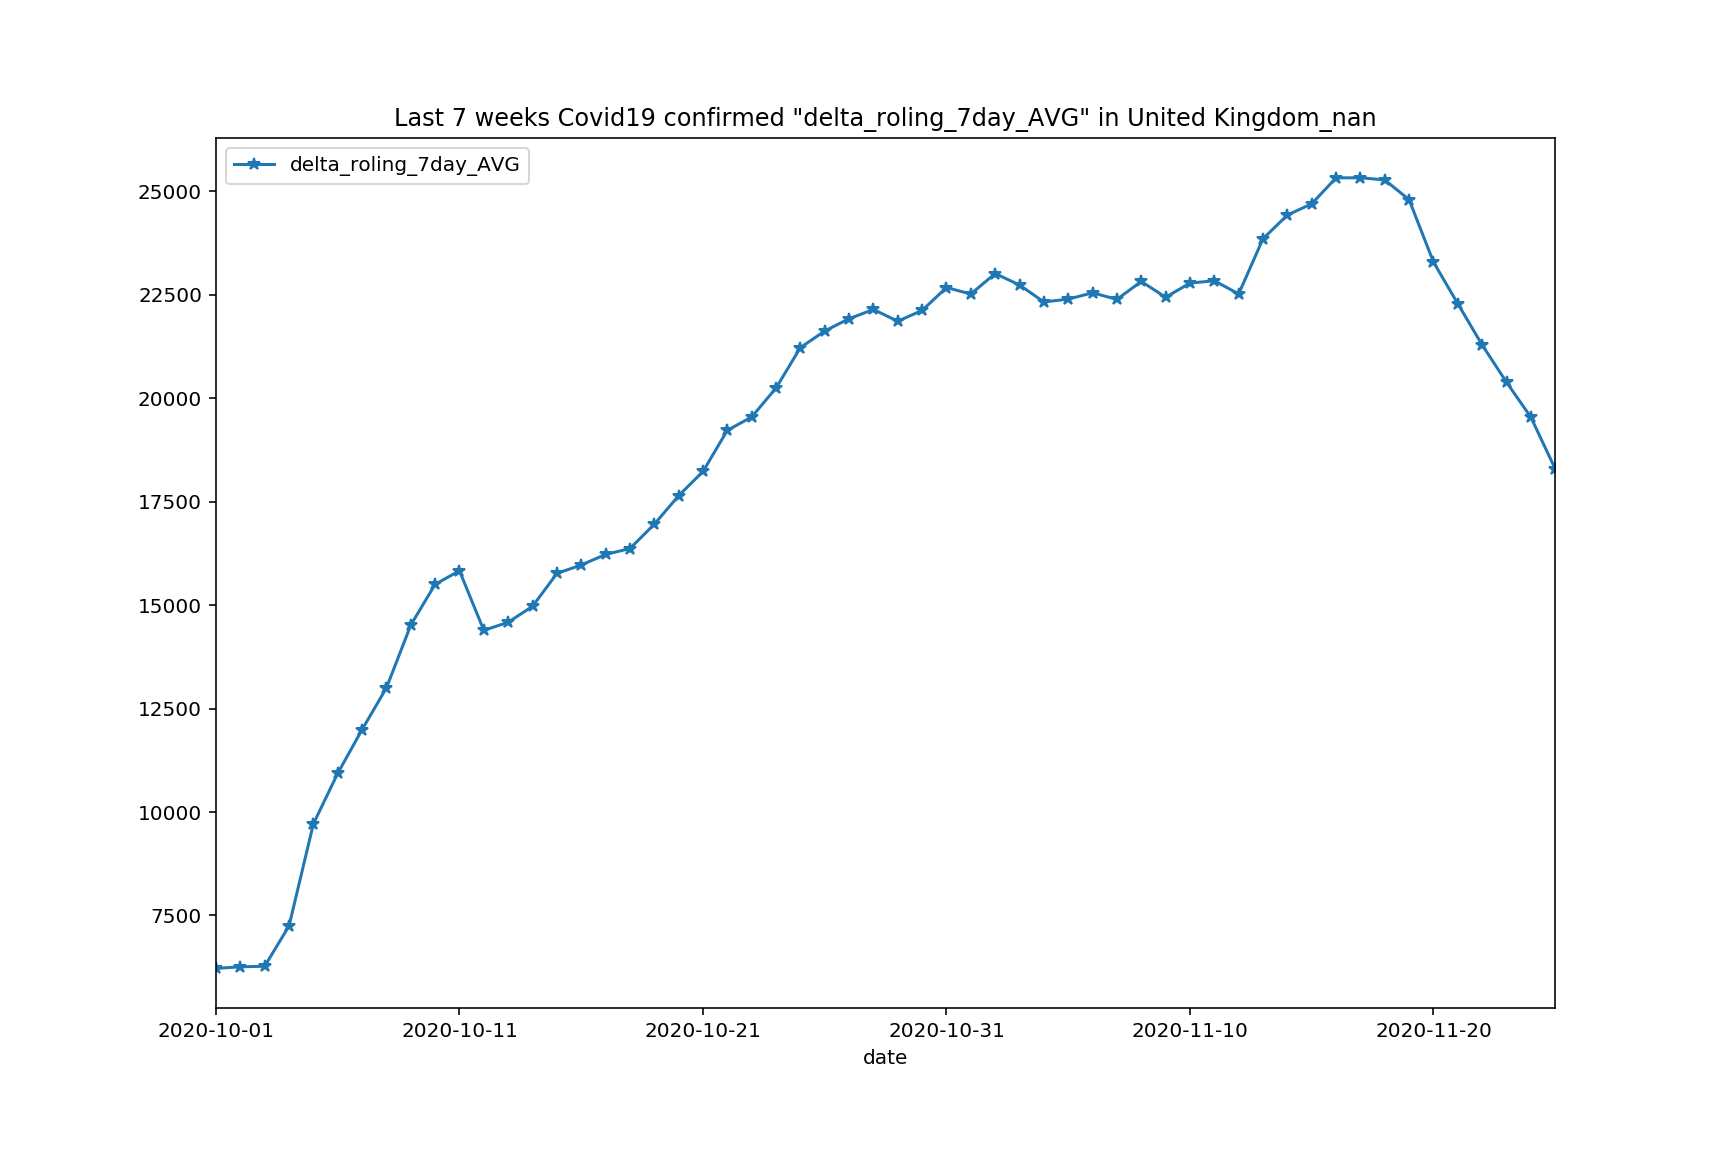

In [53]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


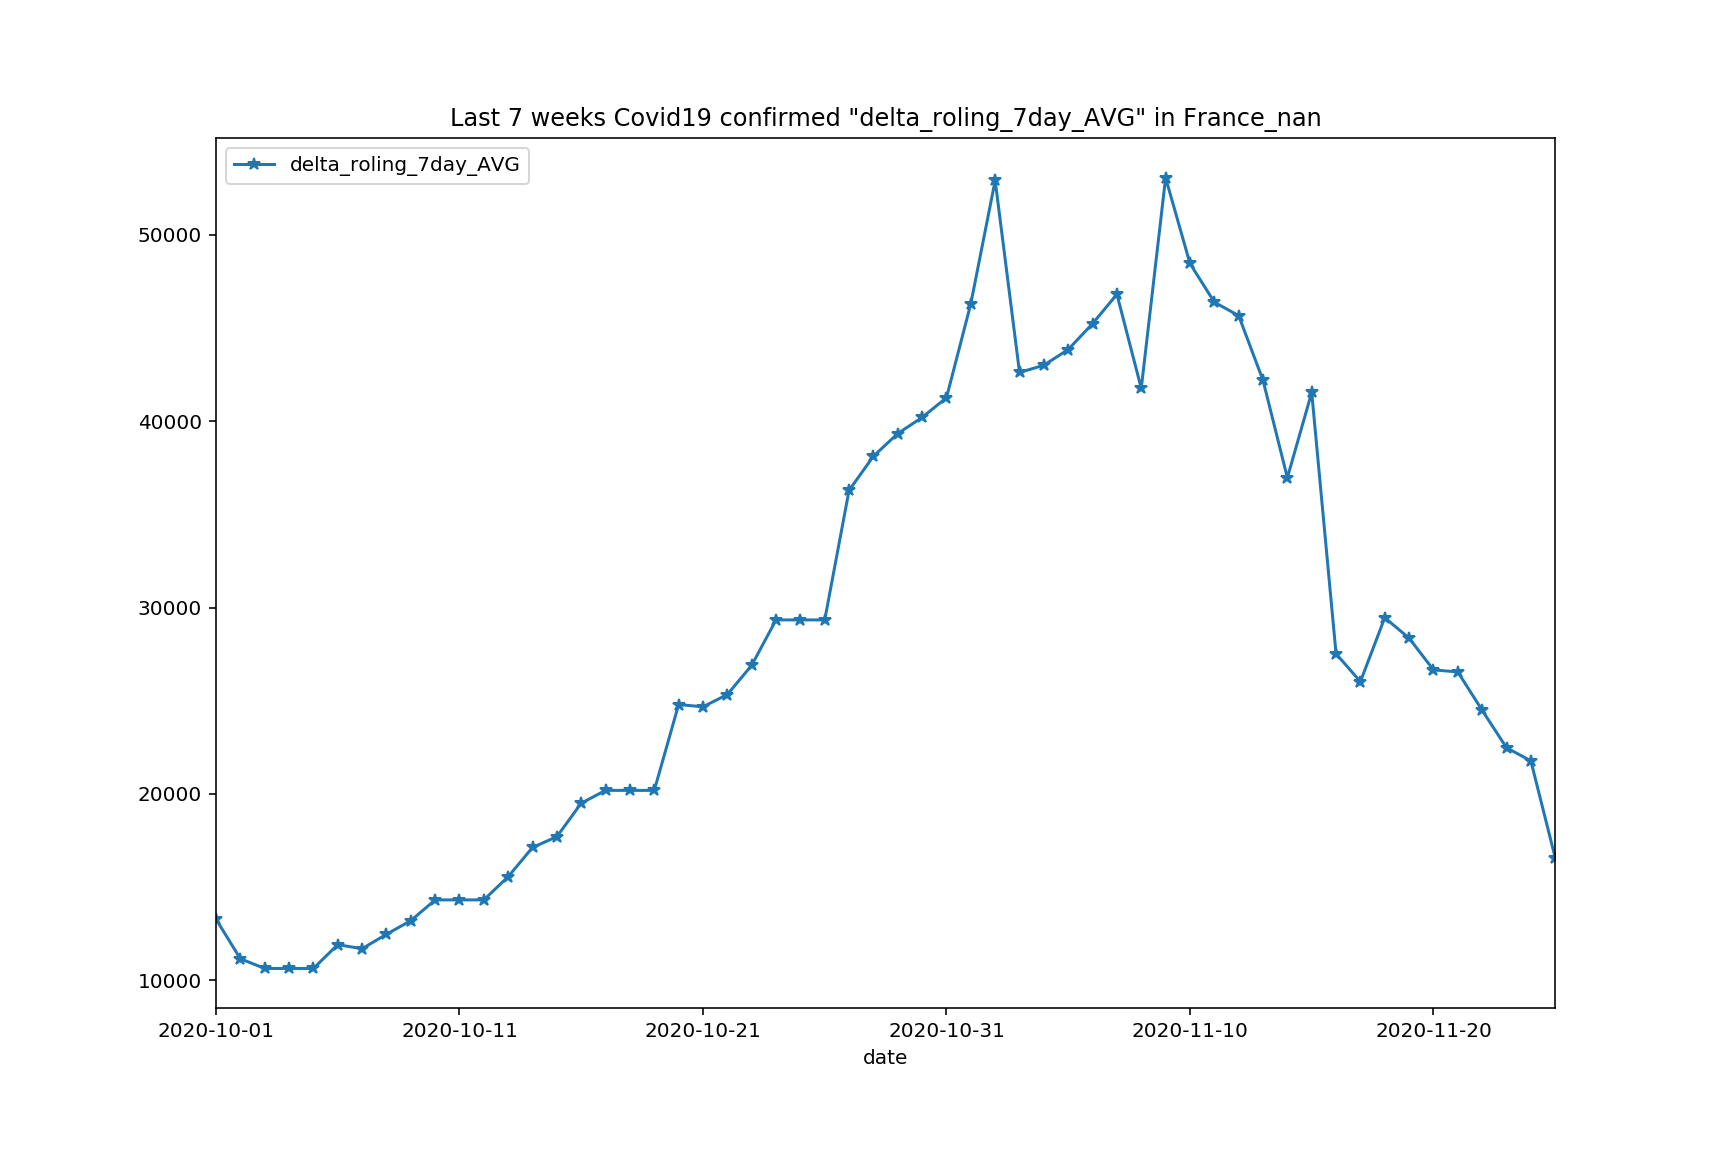

In [54]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


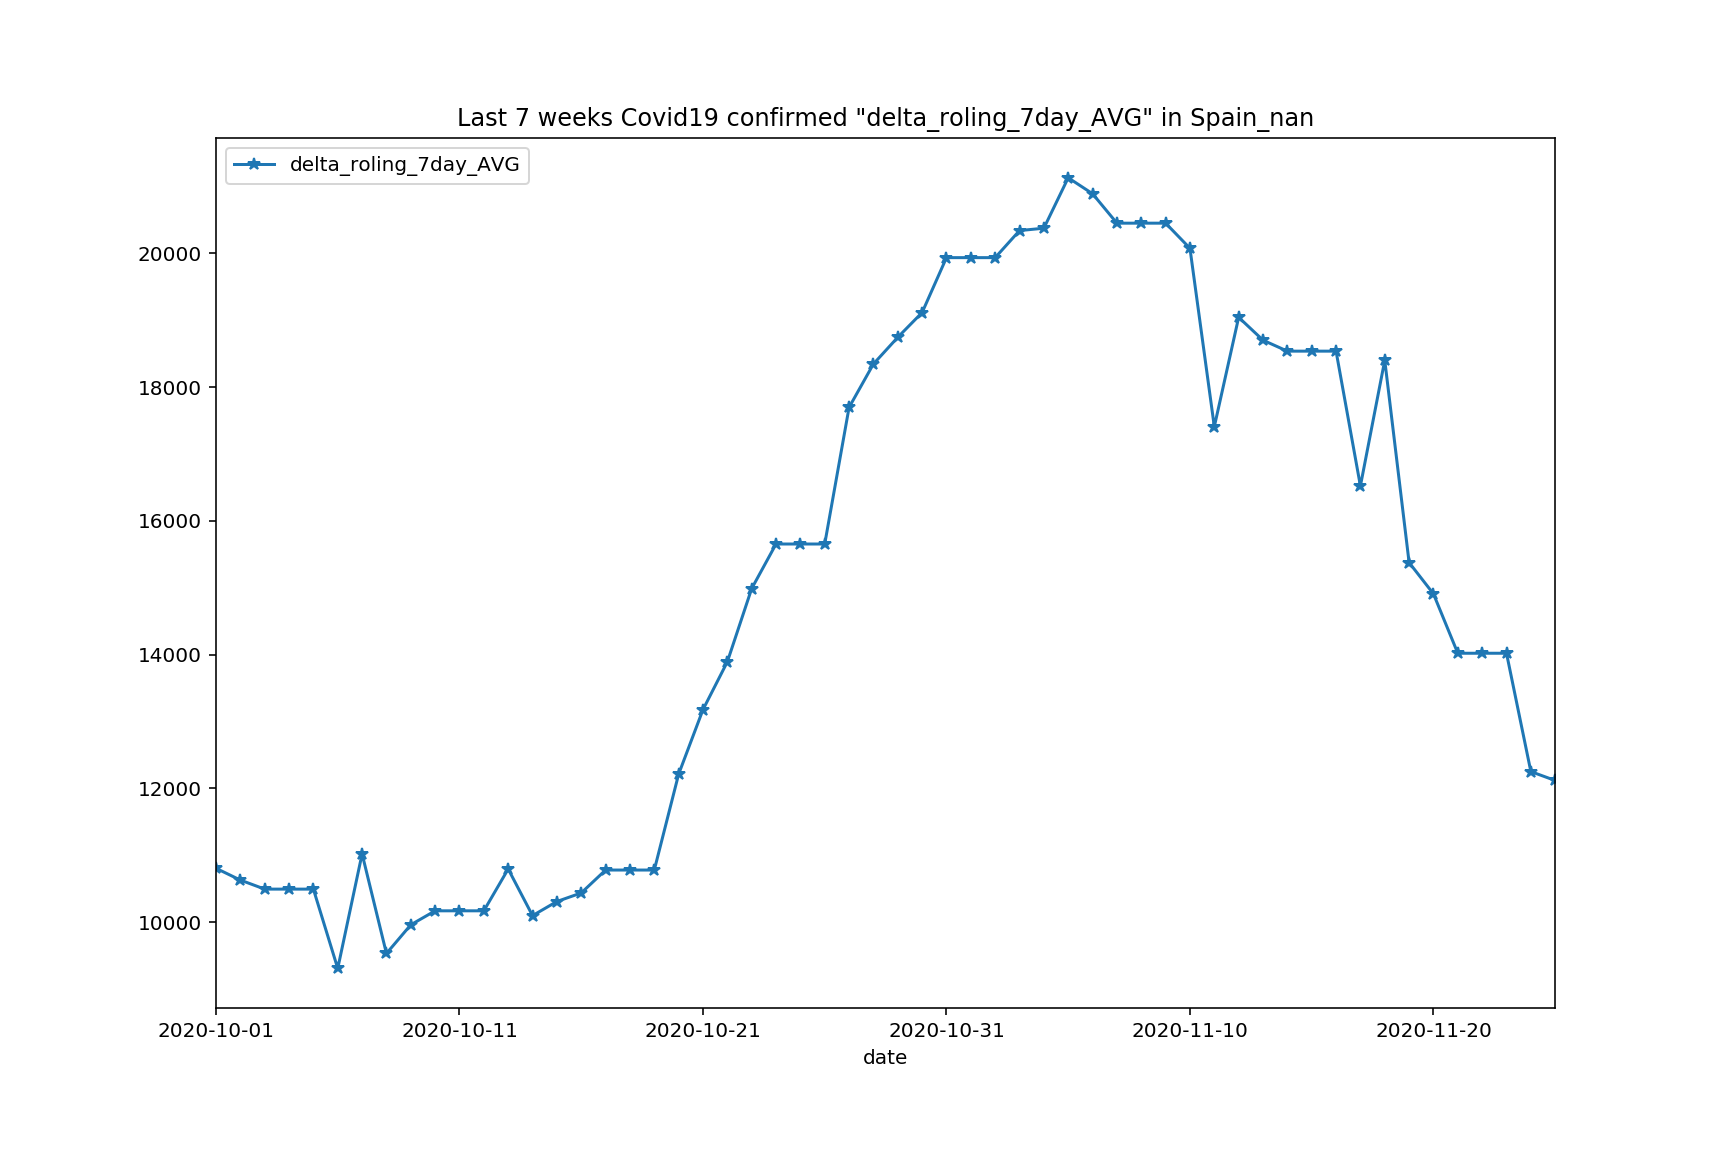

In [55]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


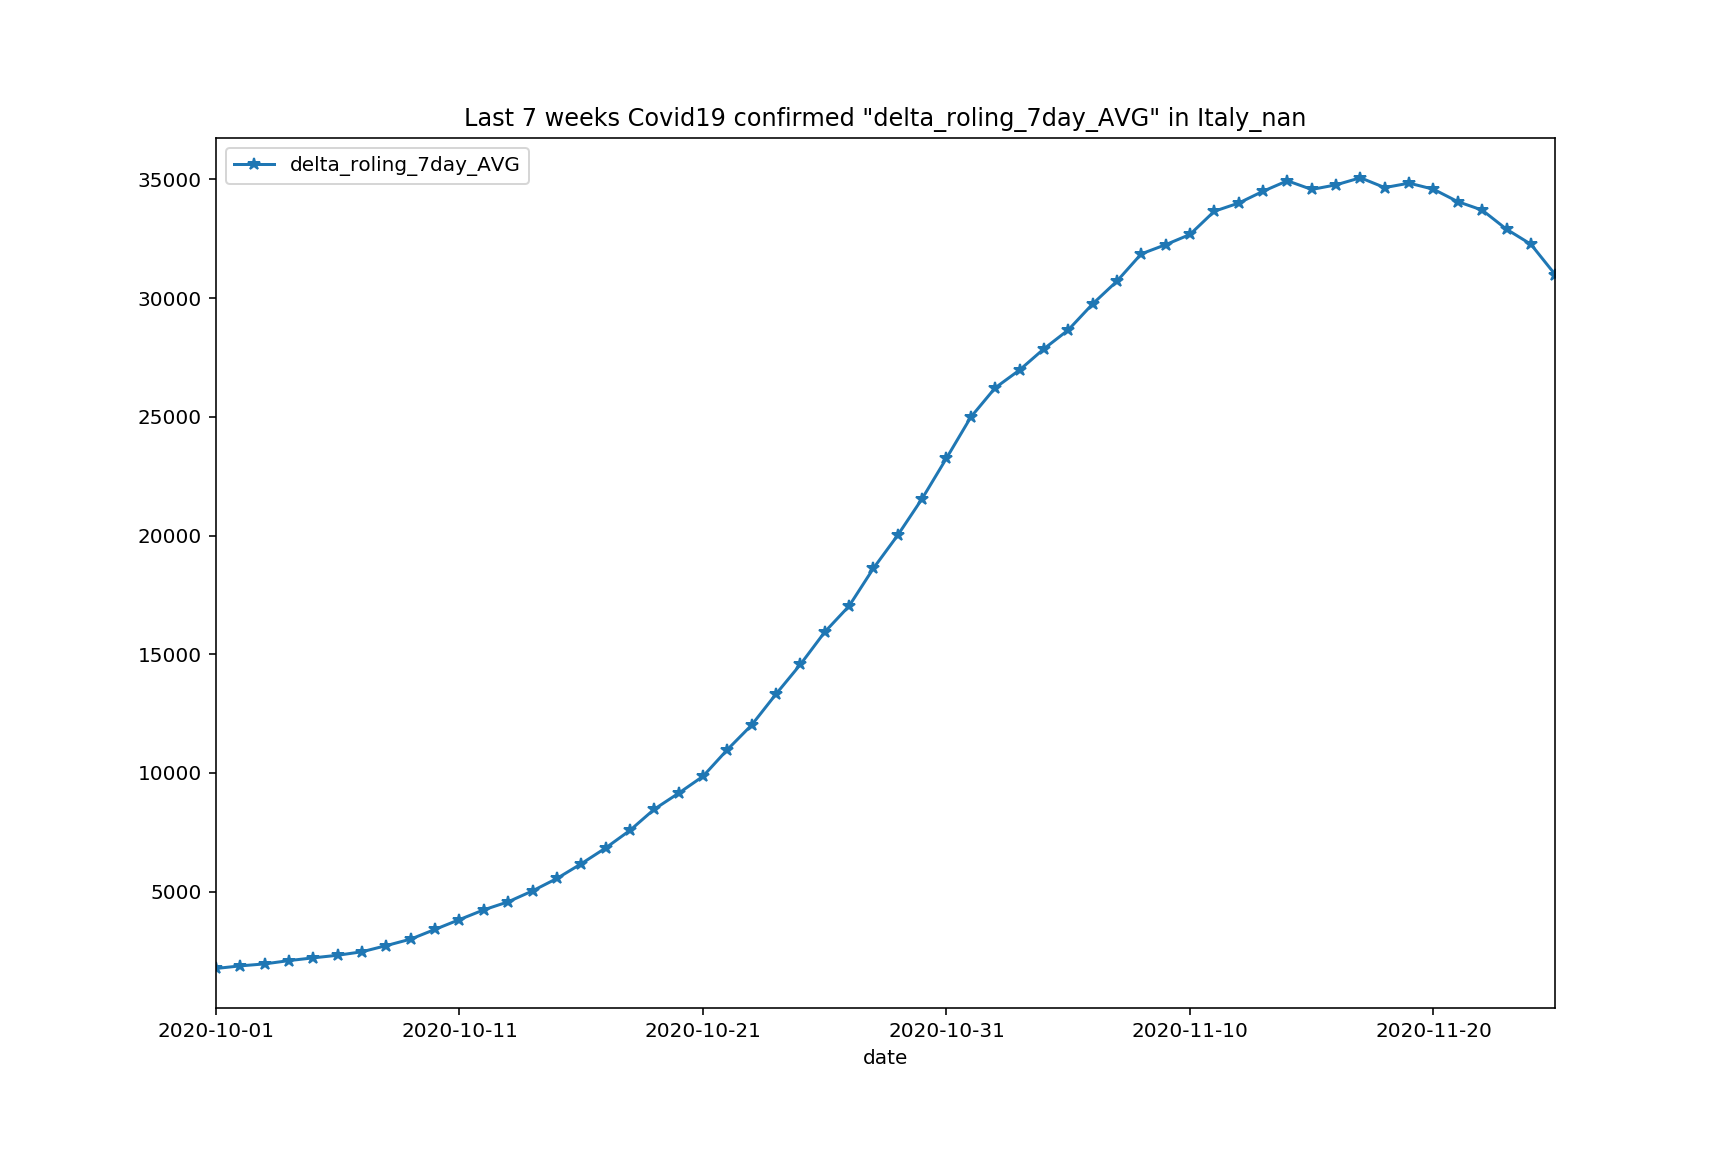

In [56]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


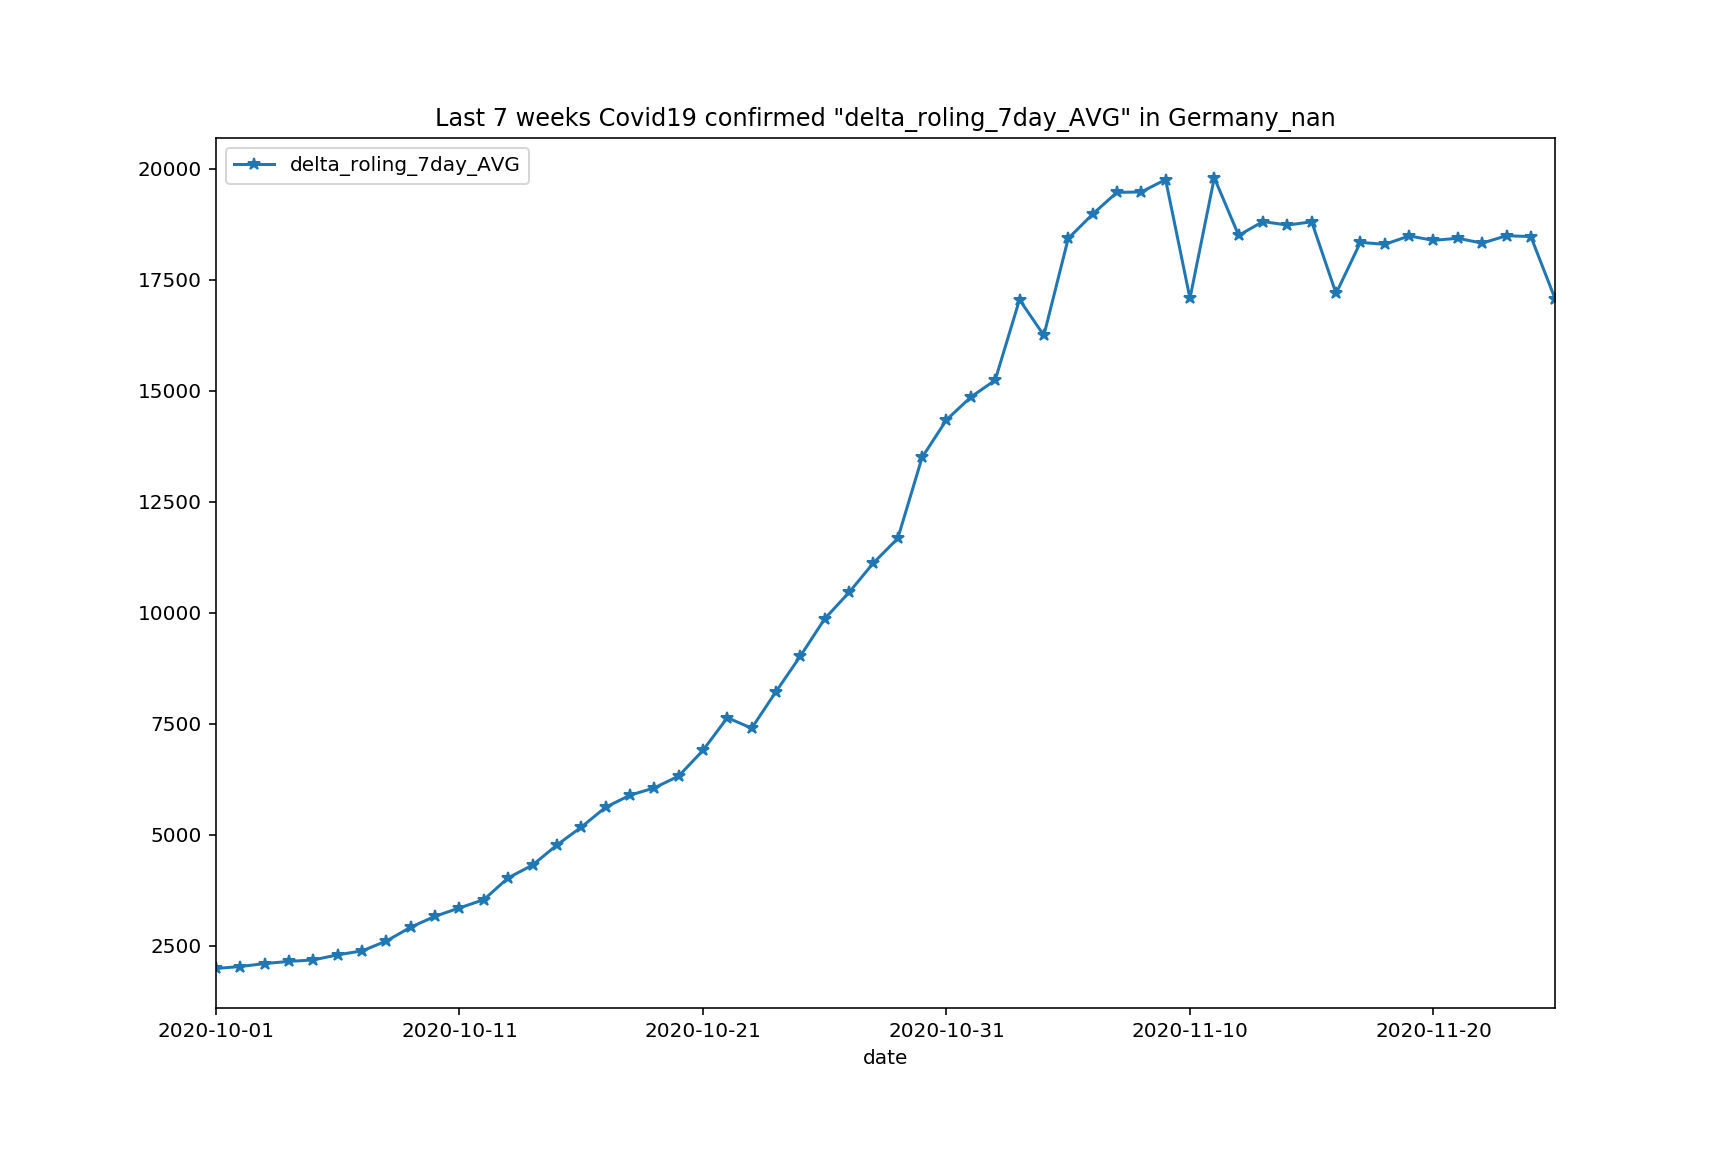

In [57]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


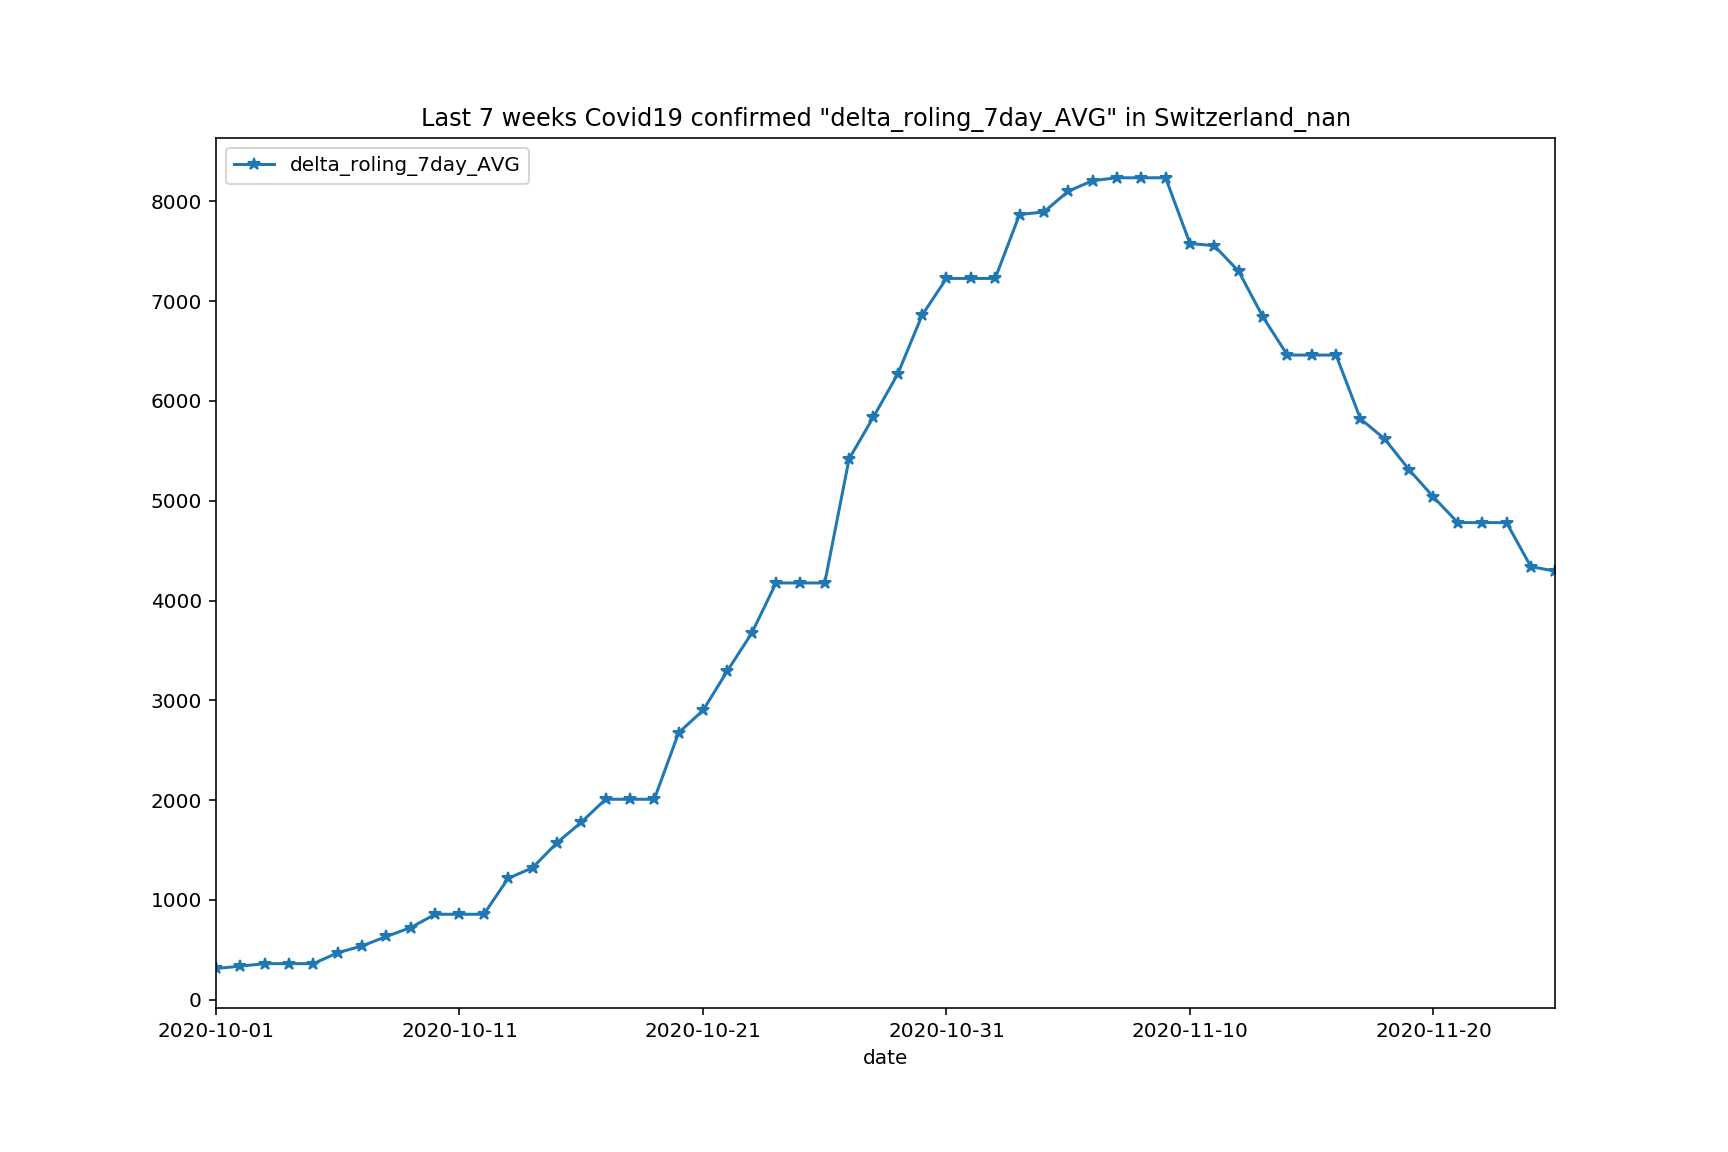

In [58]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


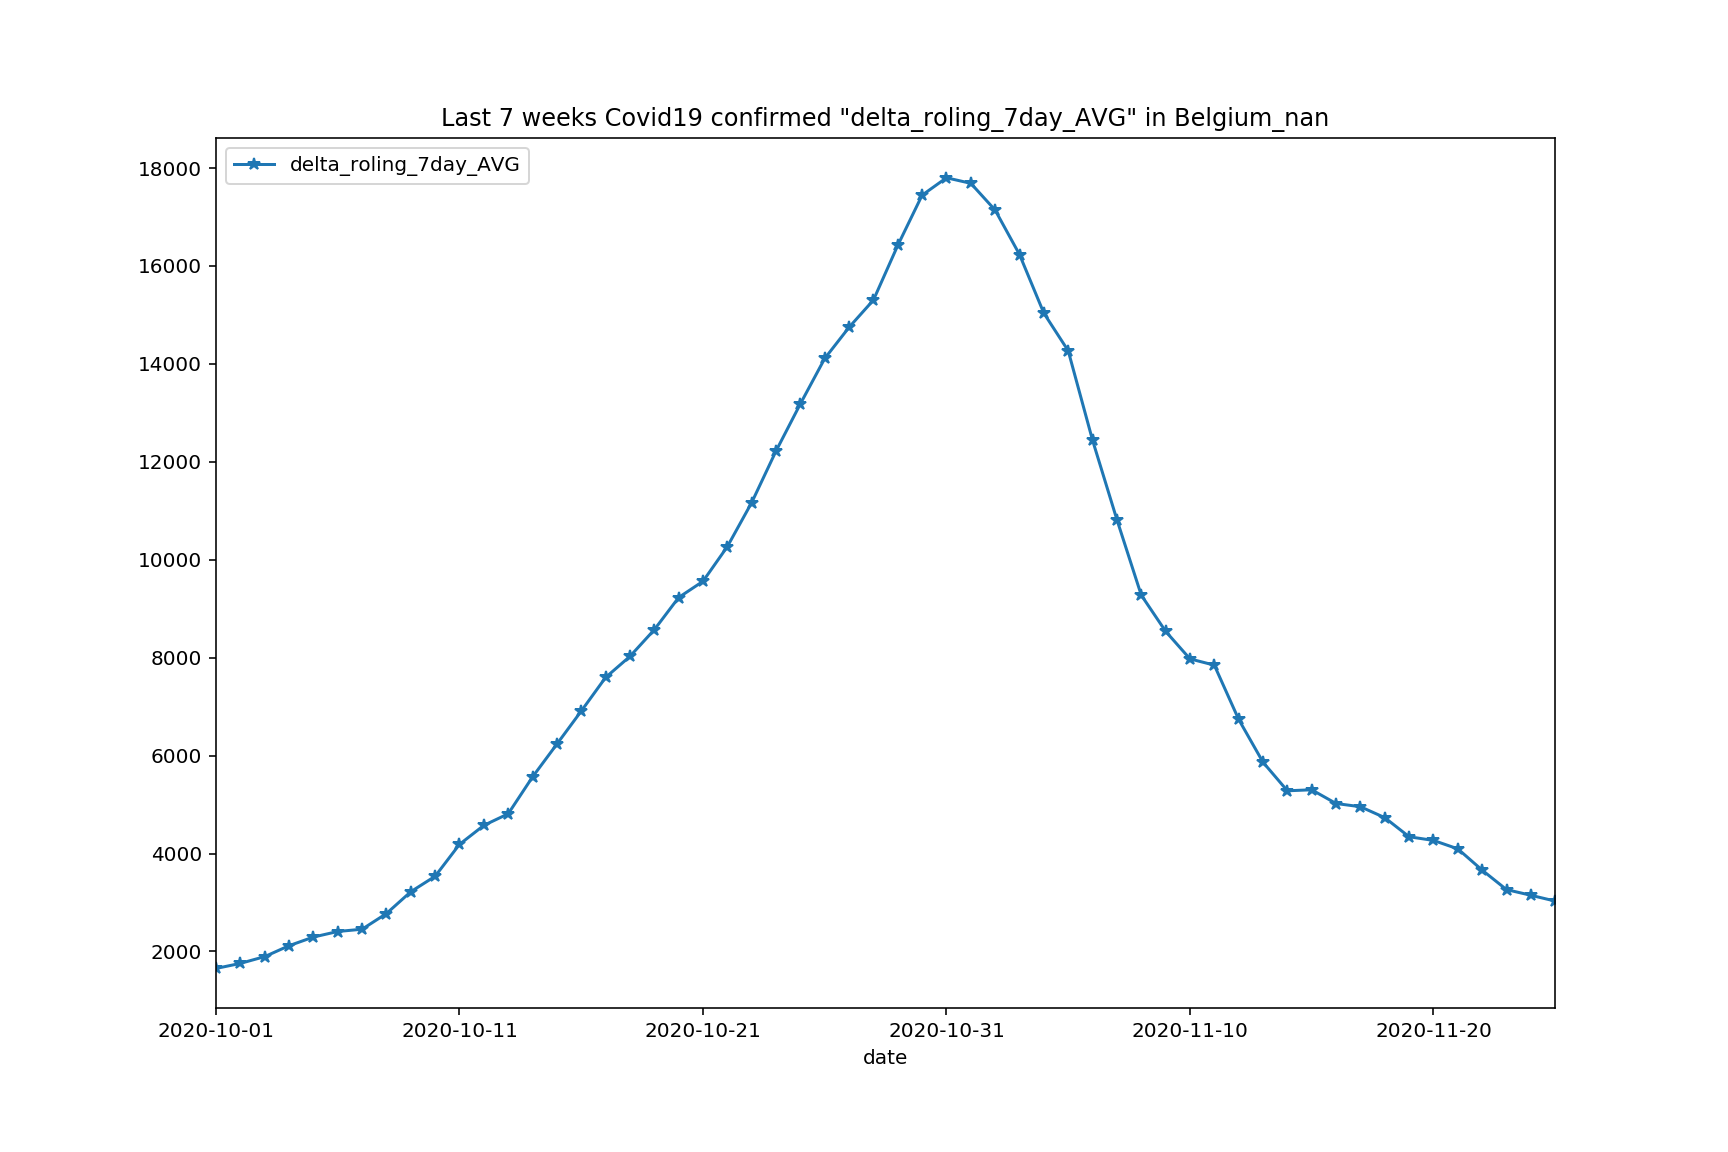

In [59]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


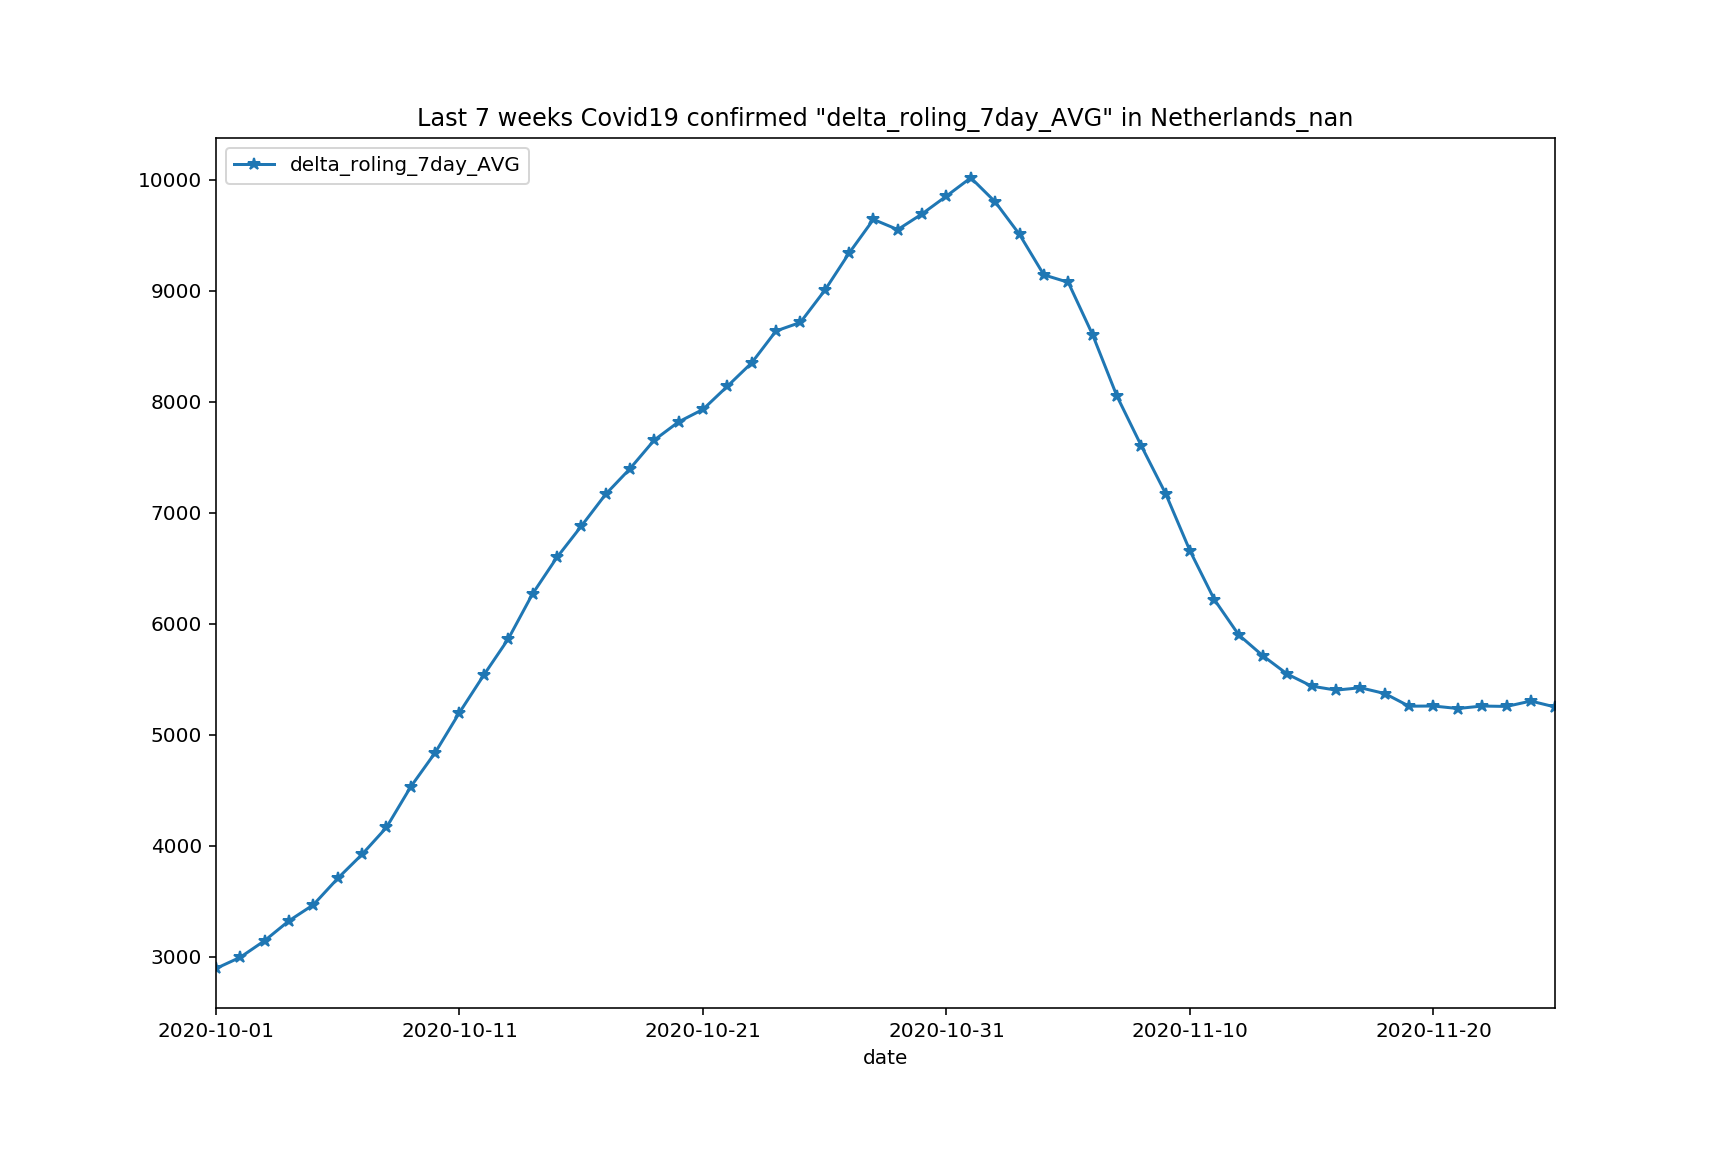

In [60]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


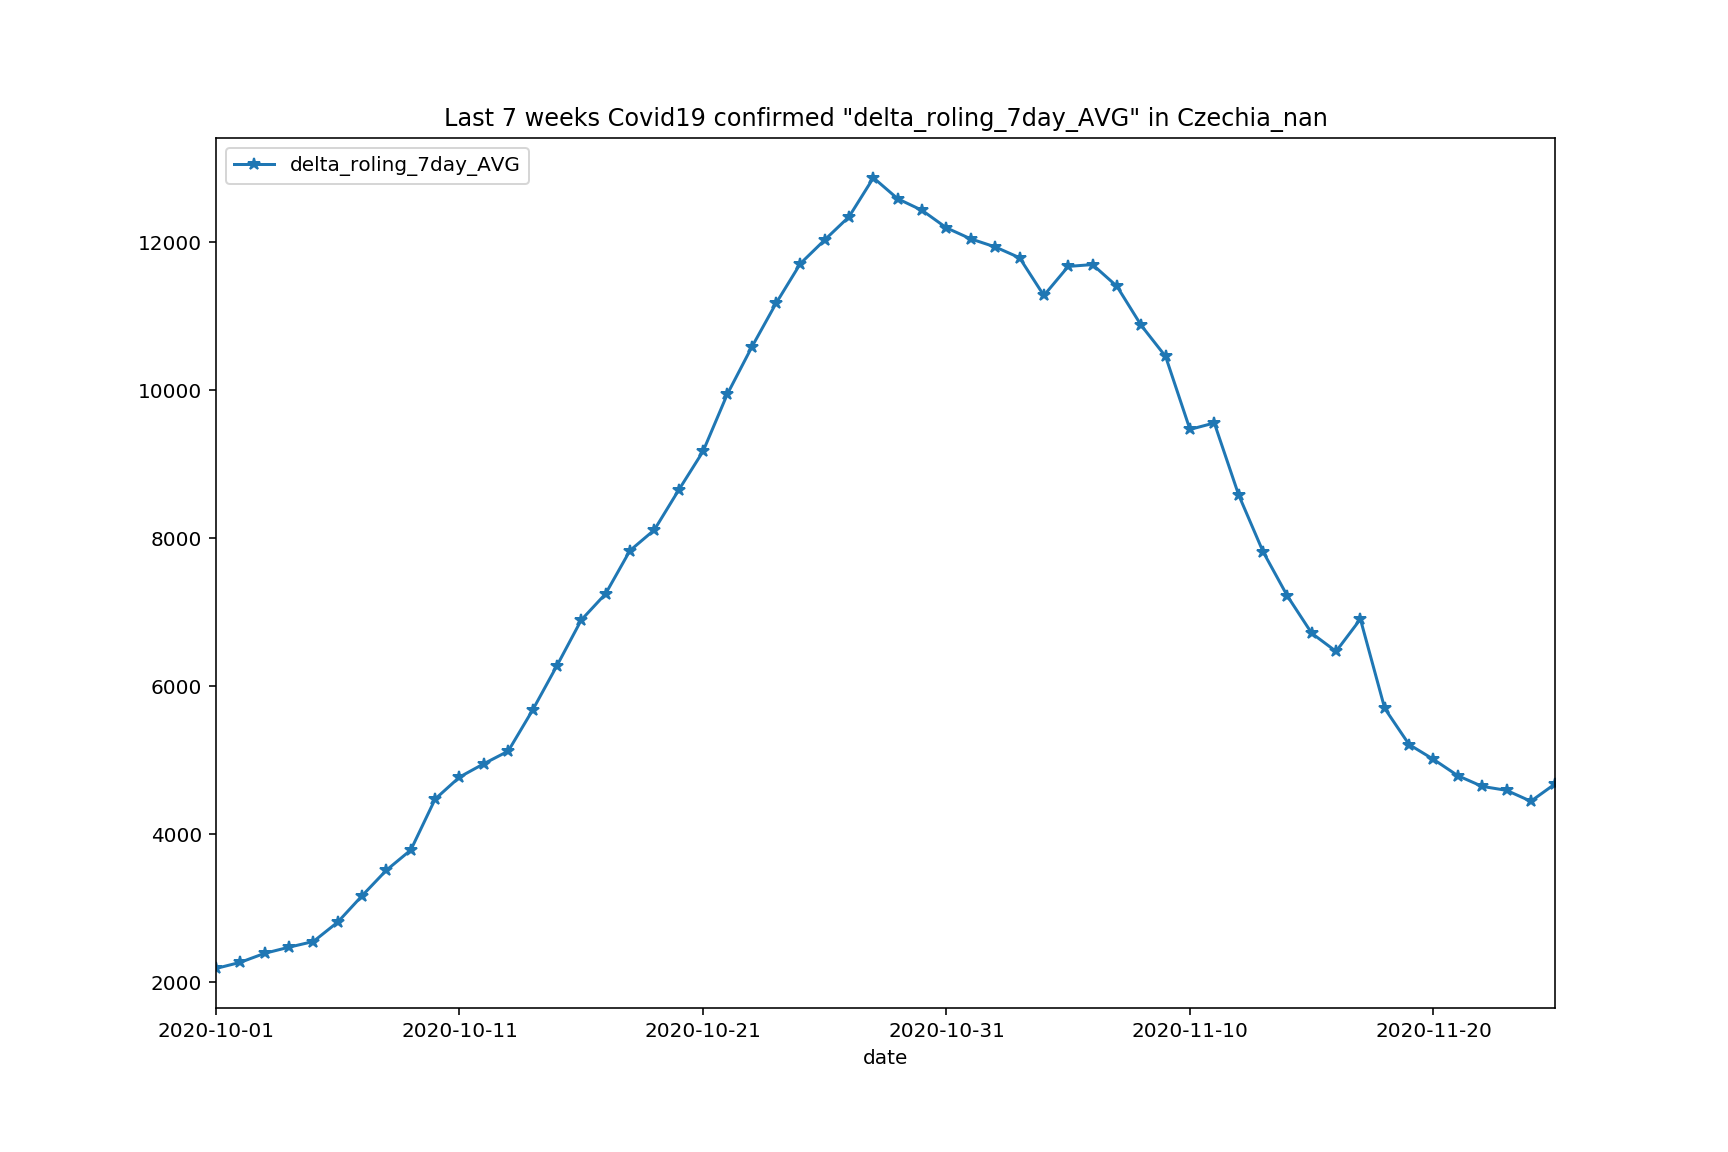

In [61]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


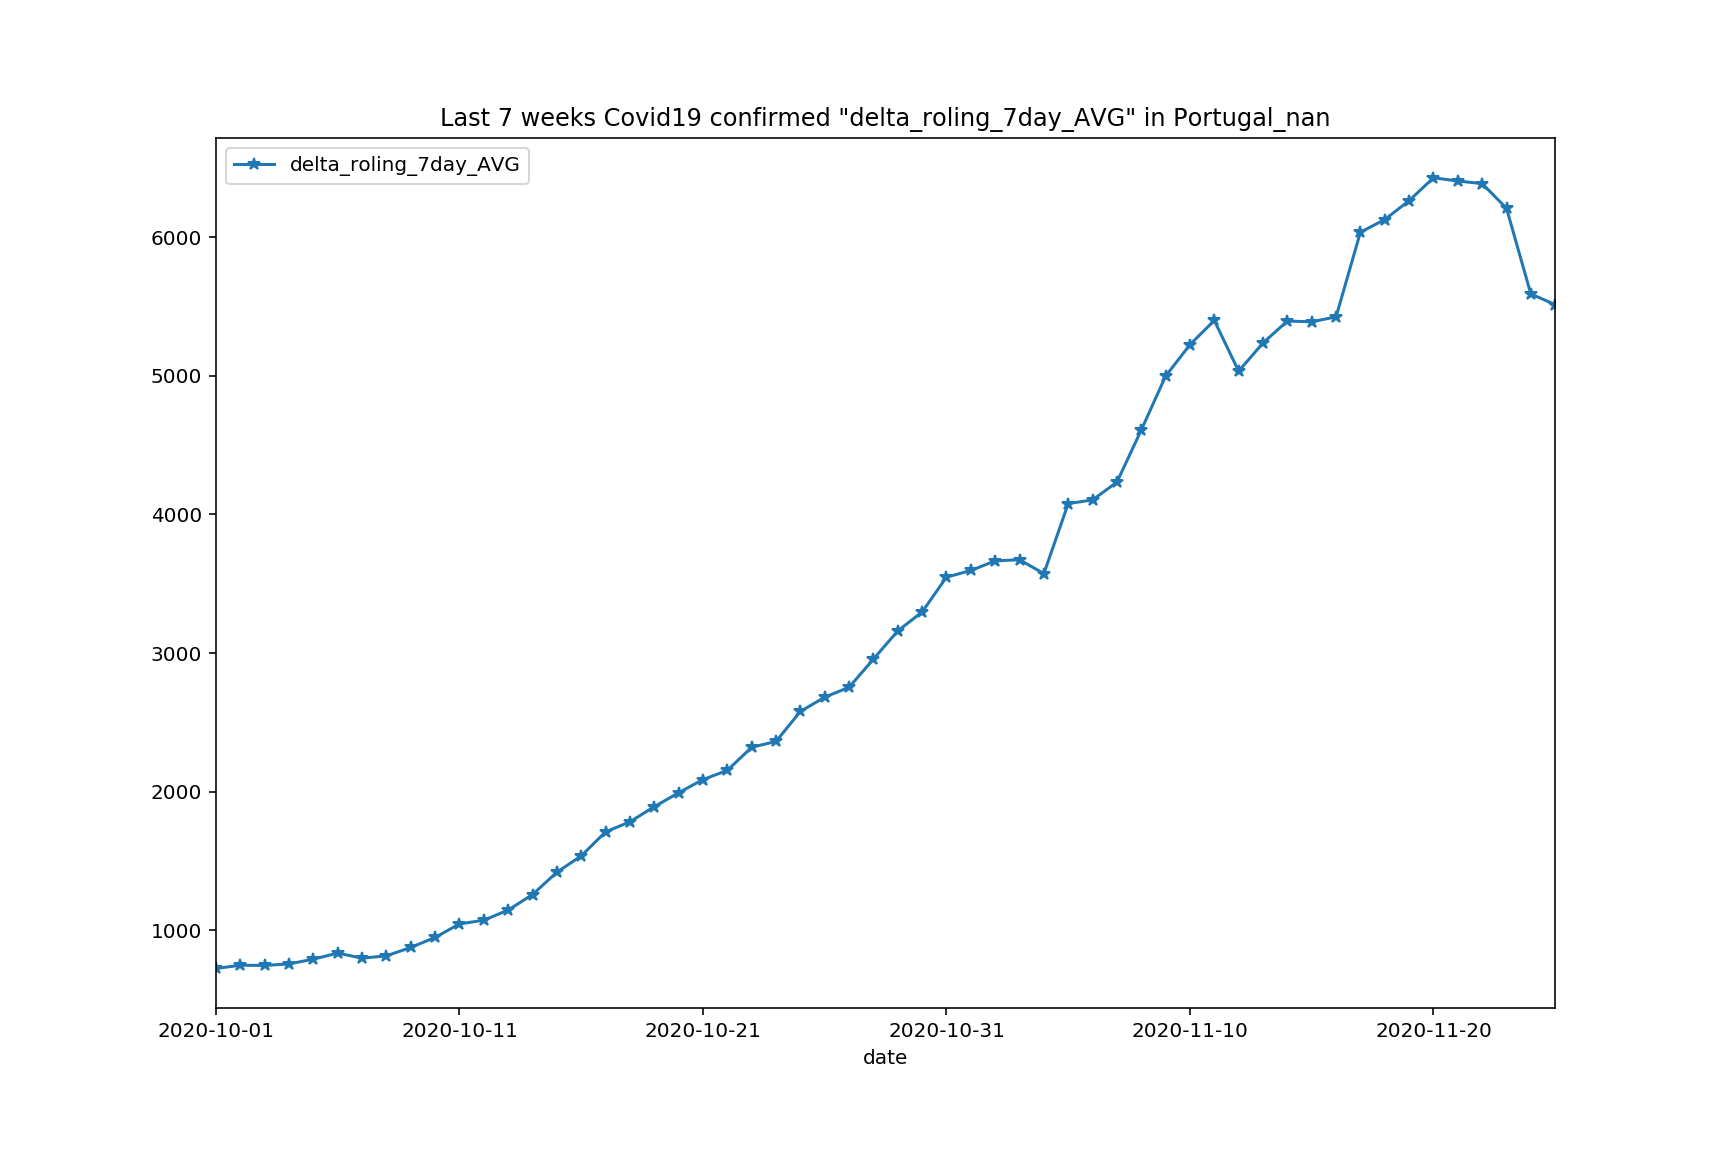

In [62]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 7 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [63]:
print("Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!")

Validation analysis for 1day-Forecast and display purpose in https://FuelBigData.com/blog is done!


In [64]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
